# BiGSLICE results

In [1]:
import os
import pandas as pd
import sqlite3
import yaml
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from upsetplot import plot, UpSet

## Extract tables from SQL database and save as CSV

The SQL database from bigslice rule was processed to generate dataframes below. This step is required only one time.

In [2]:
# data_db_file = "/datadrive/bgcflow/data/processed/mq_strepto/bigslice/cluster_as_7.0.0_v2/result/data.db"

# with sqlite3.connect(data_db_file) as conn:
#     # get all table name from sql
#     cursor = conn.cursor()
#     cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
#     sql_table_names = [i[0] for i in cursor.fetchall()]

# # convert table to pandas df
# df_tables = {}
# for t in sql_table_names:
#     df = pd.read_sql_query(f"select * from {t};", conn)
#     df_tables.update({t: df})

# df_bgcs = df_tables["bgc"]
# df_gcfs = df_tables["gcf"]
# df_gcf_membership = df_tables["gcf_membership"]

# df_gcfs = df_gcfs[df_gcfs.clustering_id==2]
# df_gcf_membership = df_gcf_membership[df_gcf_membership["gcf_id"] != 1]

# # df_bgcs.to_csv("/datadrive/bgcflow/data/processed/mq_strepto/bigslice/cluster_as_7.0.0/df_bgcs.csv")
# # df_gcfs.to_csv("/datadrive/bgcflow/data/processed/mq_strepto/bigslice/cluster_as_7.0.0/df_gcfs.csv")
# # df_gcf_membership.to_csv("/datadrive/bgcflow/data/processed/mq_strepto/bigslice/cluster_as_7.0.0/df_gcf_membership.csv")

In [3]:
with open("config.yaml", "r") as f:
    notebook_configuration = yaml.safe_load(f)
notebook_configuration

{'bgcflow_dir': '/datadrive/bgcflow'}

In [4]:
# Write samples.csv table to config directory of qc_strepto_ncbi project
bgcflow_dir = Path(notebook_configuration["bgcflow_dir"])
project_name_1 = "mq_strepto"
processed_dir_1 = bgcflow_dir / "data" / "processed" / project_name_1

# Read output tables from the processed directory
ncbi_meta_table = processed_dir_1 / "tables"/ "df_ncbi_meta.csv"
df_ncbi_meta = pd.read_csv(ncbi_meta_table, index_col= 0)

gtdb_meta_table = processed_dir_1 / "tables"/ "df_gtdb_meta_curated.csv"
df_gtdb_meta = pd.read_csv(gtdb_meta_table, index_col= 0)

seqfu_meta_table = processed_dir_1 / "tables"/ "df_seqfu_stats.csv"
df_seqfu_meta = pd.read_csv(seqfu_meta_table, index_col= 0)

mash_table = processed_dir_1 / "mash"/ "df_mash.csv"
df_mash = pd.read_csv(mash_table, index_col= 0)

df_clusters = pd.read_csv("assets/tables/df_clusters.csv", index_col=0)
df_subcluster = pd.read_csv("assets/tables/df_subclusters_reduced.csv", index_col=0)

filters_table = processed_dir_1 / "tables" / "df_filters.csv"
df_filter_quality = pd.read_csv(filters_table, index_col=0)

antismash_summary_table = processed_dir_1 / "tables" / "df_antismash_7.0.0_summary.csv"
df_antismash_summary = pd.read_csv(antismash_summary_table, index_col=0, low_memory=False)

bgcs_summary_table = processed_dir_1 / "tables" / "df_regions_antismash_7.0.0.csv"
df_bgcs_antismash = pd.read_csv(bgcs_summary_table, index_col=0)

arts_table = processed_dir_1 / "tables" / "df_arts_as-7.0.0.csv"
df_arts = pd.read_csv(arts_table, index_col=0)

# df_getphylo_clusters = pd.read_csv(processed_dir_1 / "iTOL" / 'df_phylo_colored_range_kmeans_getphylo.csv',index_col=0)

In [5]:
# Read bigslice results
df_gcf_presence = pd.read_csv(processed_dir_1 / "bigslice" / "cluster_as_7.0.0" / "df_gcf_presence.csv", index_col=0)
df_gcfs_bigslice = pd.read_csv(processed_dir_1 / "bigslice" / "cluster_as_7.0.0" / "df_gcfs_curated.csv",index_col=0) 
df_bgcs_bigslice = pd.read_csv(processed_dir_1 / "bigslice" / "cluster_as_7.0.0" / "df_bgcs_curated.csv", index_col=0)
df_gcfs_bigslice = df_gcfs_bigslice.drop(index=1)
df_gcfs_bigslice.index = [str(gcf) for gcf in df_gcfs_bigslice.index]

df_gcf_presence = df_gcf_presence.drop(columns='1')

In [6]:
# Read bigslice results
gcf_membership_table = processed_dir_1 / "bigslice" / "cluster_as_7.0.0" / "df_gcf_membership.csv"
df_gcf_membership = pd.read_csv(gcf_membership_table, index_col=0)

bigslice_gcfs_table = processed_dir_1 / "bigslice" / "cluster_as_7.0.0" / "df_gcfs.csv"
df_gcfs_bigslice = pd.read_csv(bigslice_gcfs_table, index_col=0)

bigslice_bgcs_table = processed_dir_1 / "bigslice" / "cluster_as_7.0.0" / "df_bgcs.csv"
df_bgcs_bigslice = pd.read_csv(bigslice_bgcs_table, index_col=0)

In [8]:
df_gcfs_bigslice

id  id_in_run  clustering_id
1          2          1              2
2          3          2              2
3          4          3              2
4          5          4              2
5          6          5              2
...      ...        ...            ...
11525  11526      11525              2
11526  11527      11526              2
11527  11528      11527              2
11528  11529      11528              2
11529  11530      11529              2

[11529 rows x 3 columns]

In [61]:
# for idx in df_bgcs_bigslice.index:
#     genome_id = df_bgcs_bigslice.loc[idx, "orig_folder"]
#     bgc_file = df_bgcs_bigslice.loc[idx, "orig_filename"]
#     bgc_id = bgc_file[:-4]
#     if bgc_id in df_bgcs_antismash.index:
#         df_bgcs_bigslice.loc[idx, "bgc_id"] = bgc_id
#     else:
#         print(bgc_file)
#     df_bgcs_bigslice.loc[idx, "genome_id"] = genome_id

# df_bgcs_bigslice = df_bgcs_bigslice.set_index("id")

In [62]:
# for idx in df_gcf_membership.index:
#     bgc_id = df_gcf_membership.loc[idx, "bgc_id"]
#     gcf_id = df_gcf_membership.loc[idx, "gcf_id"]
#     membership_value = df_gcf_membership.loc[idx, "membership_value"]

#     df_bgcs_bigslice.loc[bgc_id, "gcf_id"] = str(gcf_id)
#     df_bgcs_bigslice.loc[bgc_id, "membership_value"] = membership_value
# df_bgcs_bigslice = df_bgcs_bigslice.set_index("bgc_id")

In [63]:
# df_gcfs_bigslice["count"] = df_gcf_membership.gcf_id.value_counts()
# df_gcfs_bigslice = df_gcfs_bigslice.sort_values(by="count", ascending=False)

In [64]:
# df_gcfs_bigslice_large = df_gcfs_bigslice[df_gcfs_bigslice["count"] >= 10]

In [65]:
# df_gcf_presence = pd.DataFrame(0, index=df_mash_cluster_all.index, columns=df_gcfs_bigslice.index)
# for gcf_id in df_gcf_presence.columns:
#     genome_list = df_bgcs_bigslice[df_bgcs_bigslice.gcf_id == str(gcf_id)].genome_id.tolist()
#     for genome_id in genome_list:
#         if genome_id in df_gcf_presence.index:
#             df_gcf_presence.loc[genome_id, gcf_id] = df_gcf_presence.loc[genome_id, gcf_id] + 1

In [66]:
# df_gcf_presence = df_gcf_presence.applymap(lambda x: 1 if x > 0 else 0)

# Overview of the GCFs detected

In [67]:
replace_known_dict = {"surugamide A/surugamide D": "surugamide",
                      "leupeptin Pr/leupeptin Ac": "leupeptin",
                      "diisonitrile antibiotic SF2768": "SF2768",
                      "isatropolone A/isotropolone B/isotropolone C": "isatropolone",
                      "montamide A/capsimycin/clifednamide A/frontalamide A/combamide A": "montamide",
                      "legonoxamine A/desferrioxamine B/legonoxamine B": "desferrioxamine",
                      "SGR PTMs/SGR PTM Compound b/SGR PTM Compound c/SGR PTM Compound d": "SGR PTM",
                      "5-dimethylallylindole-3-acetonitrile" : "5-DMAIAN",
                      "flaviolin/1,3,6,8-tetrahydroxynaphthalene": "tetrahydroxynaphthalene",
                     "rhizomide A/rhizomide B/rhizomide C": "rhizomide",
                     "10,11-dihydro-8-deoxy-12,13-deepoxy-12,13-dihydrochalcomycin": "dihydrochalcomycin",
                     "fuelimycin A/fuelimicin B/fuelimicin C": "fuelimycin",
                     "desferrioxamin B/desferrioxamine E": "desferrioxamine",
                     "desferrioxamin B": "desferrioxamine",
                     "desferrioxamine E": "desferrioxamine",
                     "linearmycin A/linearmycin B/linearmycin C/linearmycin C": "linearmycin",
                     "youssoufene A1/youssoufene B1/youssoufene B2/youssoufene B3/youssoufene B4": "youssoufene",
                     "maduralactomycin A/maduralactomycin B/actinospirol A/actinospirol B": "maduralactomycin",
                     "10-epi-HSAF/10-epi-3-deOH-HSAF/10-epi-maltophilin/10-epi-xanthobaccin C/10-epi-hydroxymaltophilin/10-epi-FI-2": "10-epi-HSAF",
                     "montamide A/capsimycin/clifednamide A/frontalamide A/combamide A": "montamide",
                     "divergolide A/divergolide B/divergolide C/divergolide D":"divergolide",
                     "detoxin P1/detoxin P2/detoxin P3":"detoxin",
                      "CDA1b/CDA2a/CDA2b/CDA3a/CDA3b/CDA4a/CDA4": "CDA",
                      "echoside A/echoside B/echoside C/echoside D/echoside E": "echoside",
                      "salinamide A/salinamide B/salinamide C/salinamide D/salinamide E/salinamide F/desmethylsalinamide C/desmethylsalinamide E": "salinamide",
                      "ilamycin B1/ilamycin B2/ilamycin C1/ilamycin C2/ilamycin D/ilamycin E1": "ilamycin",
                      "saccharothrixin D/saccharothrixin E/saccharothrixin F/saccharothrixin G/saccharothrixin H/saccharothrixin I/saccharothrixin J/saccharothrixin K/saccharothrixin L/saccharothrixin M": "saccharothrixin",
                      "rubiginone A2/rubiginone J/rubiginone K/rubiginone L/rubiginone M/rubiginone N/ochromycinone/rubiginone B2": "rubiginone",
                      "tripartilactam/niizalactam C":"tripartilactam",
                      "valinomycin/montanastatin":"valinomycin",
                      "streptoketide A/streptoketide B/streptoketide C/S2502/S2507/UWM5":"streptoketide",
                      "mycemycin C/mycemycin A/mycemycin B": "mycemycin",
                      "skyllamycin D/skyllamycin E":"skyllamycin",
                      "hygrocin A/hygrocin B":"hygrocin",
                      "CDA1b/CDA2a/CDA2b/CDA3a/CDA3b/CDA4a/CDA4b": "CDA",
                      "hormaomycin/hormaomycin A1/hormaomycin A2/hormaomycin A3/hormaomycin A4/hormaomycin A5/hormaomycin A6": "hormaomycin",
                      "foxicin A/foxicin B/foxicin C/foxicin": "foxicin",
                      "iminimycin A/iminimycin B": "iminimycin",
                      "JBIR-76/JBIR-77": "JBIR-76",
                      "warkmycin CS1/warkmycin CS2": "warkmycin",
                      "B/ashimides A/ashimide A/ashimide B":"ashimide",
                      "incarnatapeptin A/incarnatapeptin B/dentigerumycin F/dentigerumycin G":"incarnatapeptin",
                      "JBIR-78/JBIR-95":"JBIR-78",
                      "streptophenazine 1/streptophenazine 2":"streptophenazine",
                      "clipibicyclene/azabicyclene B/azabicyclene C/azabicyclene D":"clipibicyclene ",
                      "canucin A/canucin B":"canucin",
                      }

In [68]:
df_bgcs_antismash_known = df_bgcs_antismash[df_bgcs_antismash.similarity > 0.8]

In [69]:
df_bgcs_bigslice["known_cluster_blast"] = "NA"
df_bgcs_bigslice["known_cluster_blast_name"] = "NA"
df_bgcs_bigslice.loc[df_bgcs_antismash_known.index, "known_cluster_blast"]= df_bgcs_antismash_known["most_similar_known_cluster_id"]
df_bgcs_bigslice.loc[df_bgcs_antismash_known.index, "most_similar_known_cluster_type"]= df_bgcs_antismash_known["most_similar_known_cluster_type"]
df_bgcs_bigslice.loc[df_bgcs_antismash_known.index, "known_cluster_blast_name"]= df_bgcs_antismash_known["most_similar_known_cluster_description"]

In [70]:
df_gcfs_bigslice["known_cluster_count"] = 0
df_gcfs_bigslice["known_clusters_id"] = "NA"
df_gcfs_bigslice["known_clusters_name"] = "NA"
df_gcfs_bigslice["known_clusters_type"] = "NA"
df_gcfs_bigslice["top_known_cluster_id"] = "NA"
df_gcfs_bigslice["top_known_cluster_name"] = "NA"
df_gcfs_bigslice["top_known_cluster_type"] = "NA"
df_gcfs_bigslice["top_known_cluster_category"] = "NA"

for gcf_id in df_gcfs_bigslice.index:
    df_bgcs_list = df_bgcs_bigslice[df_bgcs_bigslice.gcf_id == int(gcf_id)]
    known_bgcs_id = df_bgcs_list.known_cluster_blast.value_counts().index
    known_bgcs_id = [x for x in known_bgcs_id if x != "NA"]
    
    known_bgcs_name = df_bgcs_list.known_cluster_blast_name.value_counts().index
    known_bgcs_name = [x for x in known_bgcs_name if x != "NA"]

    known_bgcs_type = df_bgcs_list.most_similar_known_cluster_type.value_counts().index
    known_bgcs_type = [x for x in known_bgcs_type if x != "NA"]
    
    df_gcfs_bigslice.loc[gcf_id, "known_cluster_count"] = len(known_bgcs_id)
    df_gcfs_bigslice.loc[gcf_id, "known_clusters_id"] = ",".join(known_bgcs_id)
    df_gcfs_bigslice.loc[gcf_id, "known_clusters_name"] = ",".join(known_bgcs_name)
    df_gcfs_bigslice.loc[gcf_id, "known_clusters_type"] = ",".join(known_bgcs_type)

    if len(known_bgcs_id) >0:
        df_gcfs_bigslice.loc[gcf_id, "top_known_cluster_id"] = known_bgcs_id[0]
        df_gcfs_bigslice.loc[gcf_id, "top_known_cluster_name"] = known_bgcs_name[0]
        df_gcfs_bigslice.loc[gcf_id, "top_known_cluster_type"] = known_bgcs_type[0]
        if ":" in known_bgcs_type[0]:
            df_gcfs_bigslice.loc[gcf_id, "top_known_cluster_category"] = known_bgcs_type[0].split(":")[0]
        else:
            df_gcfs_bigslice.loc[gcf_id, "top_known_cluster_category"] = known_bgcs_type[0]
        
        

df_gcfs_bigslice["known"] = ["Unknown" if mibig == "NA" else "Known" for mibig in df_gcfs_bigslice.top_known_cluster_id]

# All GCFs of BiGSLICE distribution

/tmp/ipykernel_2163/4258439479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Cluster_label.fillna("NA",inplace=True)


<Figure size 1500x1000 with 0 Axes>

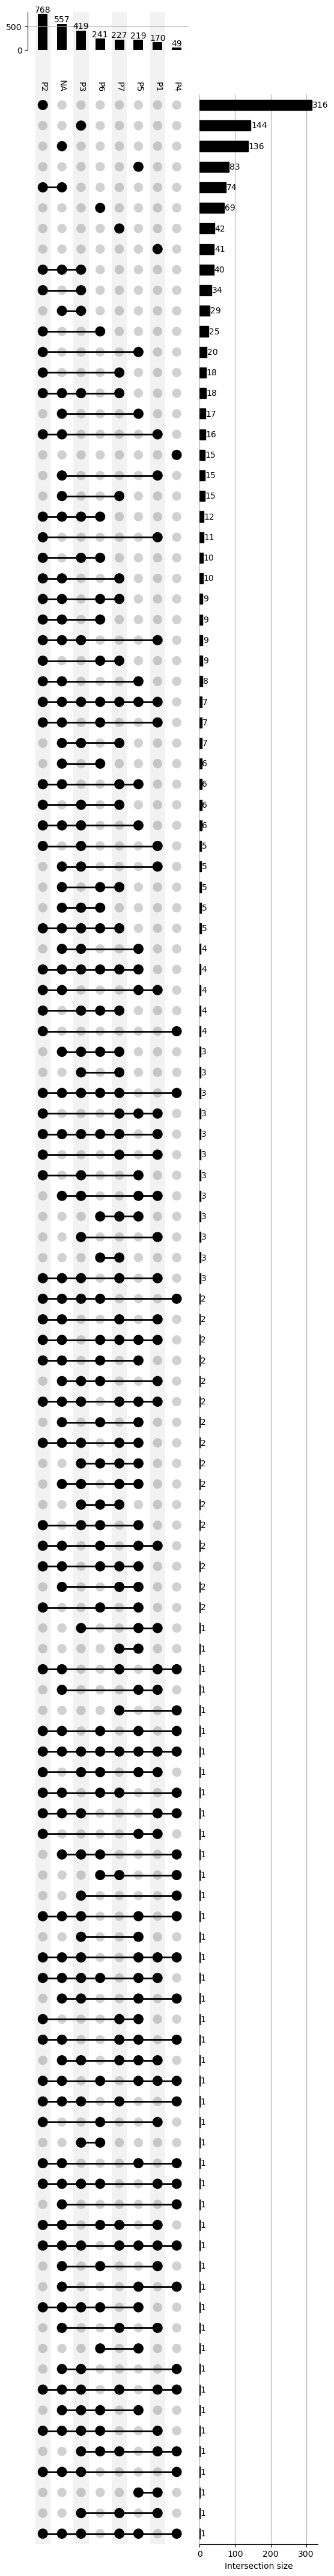

In [570]:
# Melt the dataframe
df_gcf_presence_tmp = df_gcf_presence.loc[:, df_gcfs_bigslice[df_gcfs_bigslice["count"] > 5].index]
df_gcf_presence_tmp["genome_id"] = df_gcf_presence_tmp.index
df1 = df_gcf_presence_tmp.melt(id_vars=["genome_id"], value_vars=df_gcf_presence_tmp.columns[:-1],
                               var_name="BGC",
                               value_name="presence")
df2 = df_clusters[["Cluster_label"]]
df2.Cluster_label.fillna("NA",inplace=True)
# Merging dataframes
df = df1.merge(df2, on='genome_id')

# Creating a pivot table
pivot_table = df.pivot_table(index='BGC', columns='Cluster_label', values='presence', aggfunc='sum').fillna(0)

df_binary = (pivot_table > 0).astype(int)

# Convert the wide DataFrame to a long one
df_long = df_binary.reset_index().melt(id_vars='BGC', value_name='presence')
# Filter out entries where presence is 0
df_long = df_long[df_long.presence == 1]

# Create a boolean matrix representation
df_bool = pd.crosstab(df_long['BGC'], df_long['Cluster_label'])

# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_bool.astype(bool)))

# Manually set the colors
plt.figure(figsize=(15, 10))

ax = plot(df_multi_index, subset_size='count', sort_by="cardinality", show_counts=True, orientation="vertical")
plt.savefig("assets/figures/upset_gcfs.svg")
plt.savefig("assets/figures/upset_gcfs.png")
plt.show()

## Common GCF spread across 6 or more phylogroups

<Figure size 1500x1000 with 0 Axes>

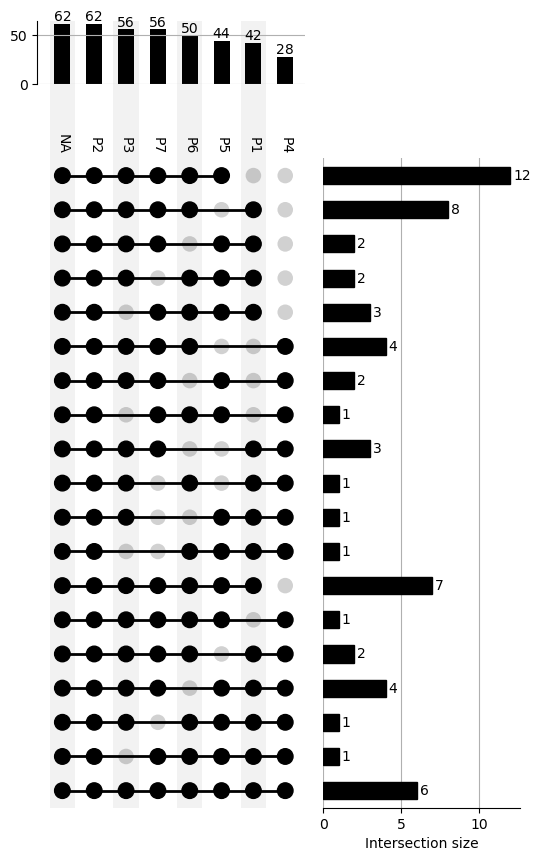

In [380]:
# Filter rows that are present in more than 6 groups
df_filtered = df_binary[df_binary.sum(axis=1) >= 6]


# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_filtered.astype(bool)))

# Manually set the colors
plt.figure(figsize=(15, 10))

ax = plot(df_multi_index, subset_size='count', show_counts=True, orientation="vertical")
plt.savefig("assets/figures/upset_gcfs_6_and_above.svg")
plt.savefig("assets/figures/upset_gcfs_6_and_above.png")
plt.show()

<Figure size 2000x4000 with 0 Axes>

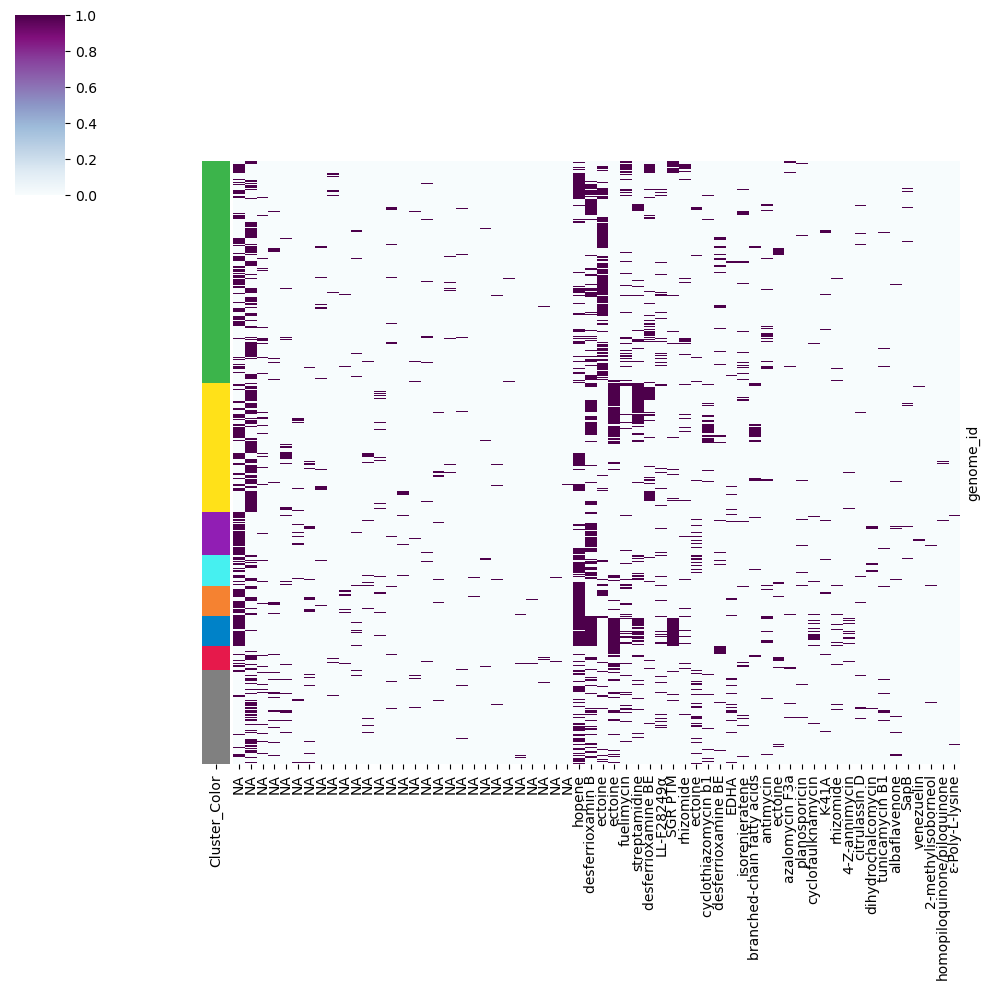

In [468]:
df_filtered = df_binary[df_binary.sum(axis=1) >= 6]
df_gcf_common = df_gcfs_bigslice.loc[df_filtered.index,:]
df_gcf_presence_common = df_gcf_presence.loc[:, df_gcf_common.index]

df_gcf_common = df_gcf_common.sort_values(by=["known", "count", "top_known_cluster_name"], ascending=False)

df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color"]]
df_heatmap = df_gcf_presence.loc[df_clusters.index, df_gcf_common.index]
df_heatmap.columns = [mibig if mibig not in replace_knonw_dict.keys() else replace_knonw_dict[mibig] for mibig in df_gcf_common.top_known_cluster_name]
plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=True, yticklabels=False)
plt.savefig("assets/figures/Figure_3/bigslice_present_common.png")

## Accessory GCFs present in 2 to 5 phylogroups (most significant intersections selected)

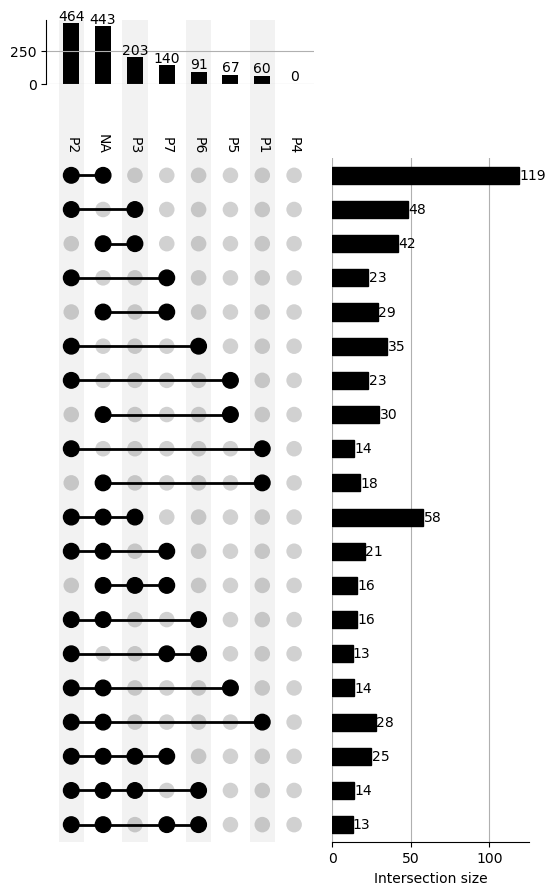

In [491]:
# Filter BGCs present in 2 to 6 groups and keep top n intersections 
df_filtered = df_binary[(df_binary.sum(axis=1) > 1) & (df_binary.sum(axis=1) < 6)]

# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_filtered.astype(bool)))

# Calculate the size of each intersection
intersection_counts = df_multi_index.groupby(level=list(range(df_multi_index.index.nlevels))).size()

# Sort by size and keep the top n intersections
n = 20
top_intersections = intersection_counts.nlargest(n).index

# Filter df_multi_index to only include top intersections
df_multi_index_filtered = df_multi_index[df_multi_index.index.isin(top_intersections)]

# This will sort by size of intersections and only show the top 10
ax = plot(df_multi_index_filtered, subset_size='count', show_counts=True, orientation="vertical")
plt.savefig("assets/figures/upset_gcfs_2_6.svg")
plt.savefig("assets/figures/upset_gcfs_2_6.png")
plt.show()

<Figure size 2000x4000 with 0 Axes>

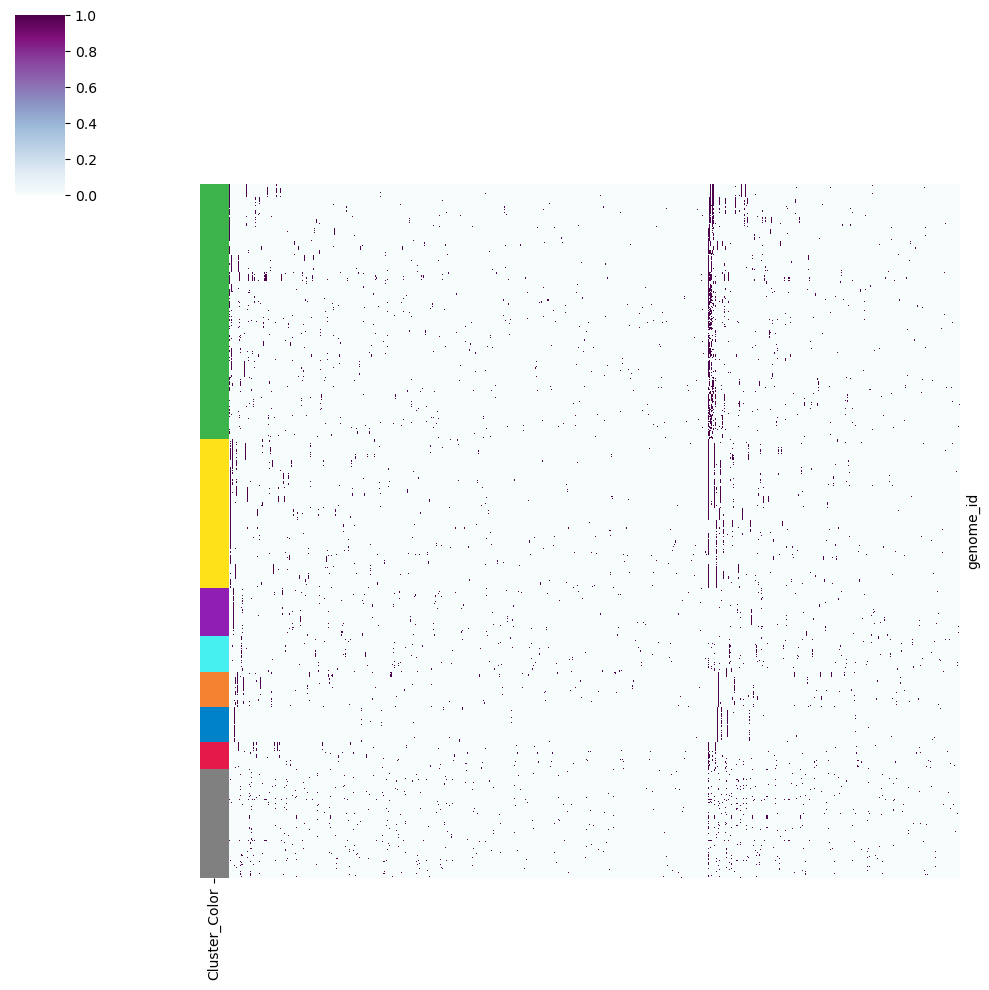

In [492]:
df_filtered = df_binary[(df_binary.sum(axis=1) > 1) & (df_binary.sum(axis=1) < 6)]

df_gcf_accessory = df_gcfs_bigslice.loc[df_filtered.index,:]
df_gcf_presence_accessort = df_gcf_presence.loc[:, df_gcf_accessory.index]

df_gcf_accessory = df_gcf_accessory.sort_values(by=["known", "count", "top_known_cluster_name"], ascending=False)

df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color"]]
df_heatmap = df_gcf_presence.loc[df_clusters.index, df_gcf_accessory.index]
df_heatmap.columns = [mibig if mibig not in replace_knonw_dict.keys() else replace_knonw_dict[mibig] for mibig in df_gcf_accessory.top_known_cluster_name]
plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=False, yticklabels=False)
plt.savefig("assets/figures/Figure_3/bigslice_present_accesory.png")

In [485]:
replace_knonw_dict = {"surugamide A/surugamide D": "surugamide",
                      "leupeptin Pr/leupeptin Ac": "leupeptin",
                      "diisonitrile antibiotic SF2768": "SF2768",
                      "isatropolone A/isotropolone B/isotropolone C": "isatropolone",
                      "montamide A/capsimycin/clifednamide A/frontalamide A/combamide A": "montamide",
                      "legonoxamine A/desferrioxamine B/legonoxamine B": "legonoxamine",
                      "SGR PTMs/SGR PTM Compound b/SGR PTM Compound c/SGR PTM Compound d": "SGR PTM",
                      "5-dimethylallylindole-3-acetonitrile" : "5-DMAIAN",
                      "flaviolin/1,3,6,8-tetrahydroxynaphthalene": "tetrahydroxynaphthalene",
                     "rhizomide A/rhizomide B/rhizomide C": "rhizomide",
                     "10,11-dihydro-8-deoxy-12,13-deepoxy-12,13-dihydrochalcomycin": "dihydrochalcomycin",
                     "fuelimycin A/fuelimicin B/fuelimicin C": "fuelimycin",
                     "desferrioxamin B/desferrioxamine E": "desferrioxamine BE",
                     "linearmycin A/linearmycin B/linearmycin C/linearmycin C": "linearmycin",
                     "youssoufene A1/youssoufene B1/youssoufene B2/youssoufene B3/youssoufene B4": "youssoufene",
                     "maduralactomycin A/maduralactomycin B/actinospirol A/actinospirol B": "maduralactomycin",
                     "": ""}

<Figure size 2000x4000 with 0 Axes>

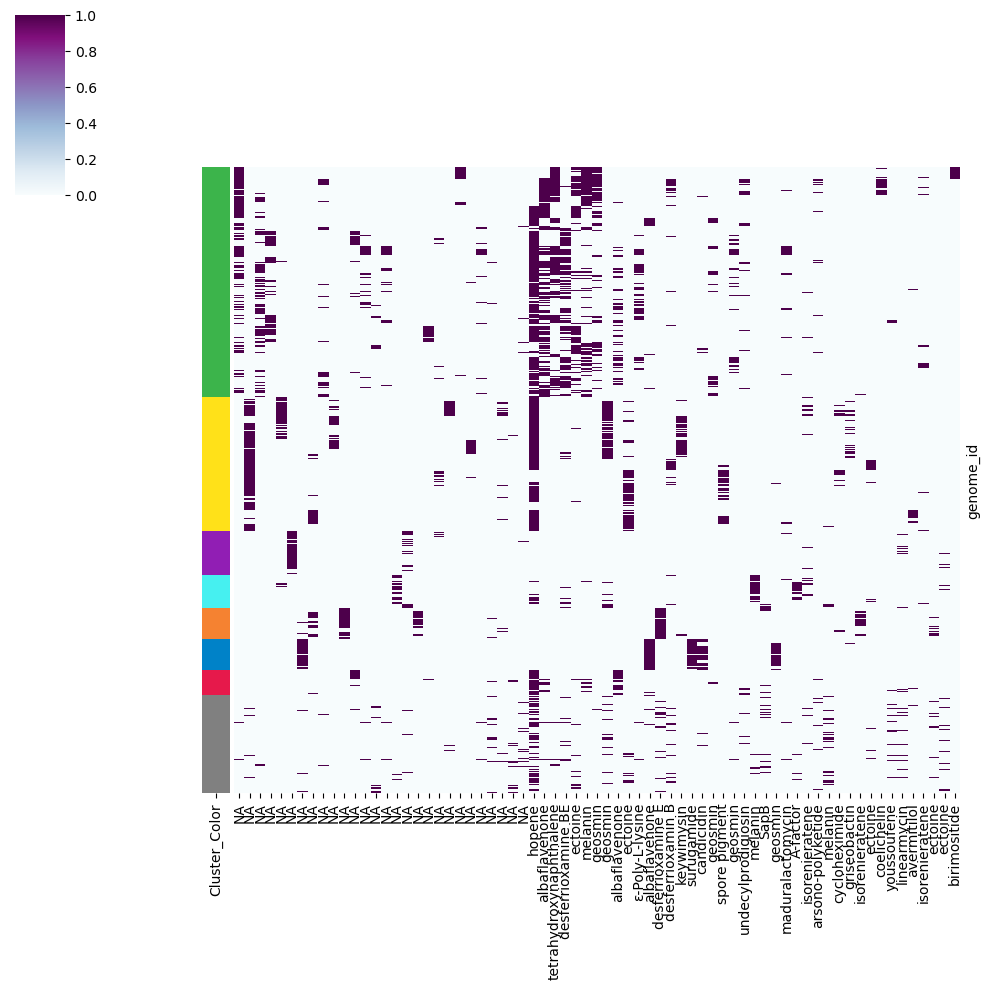

In [486]:
df_filtered = df_binary[(df_binary.sum(axis=1) > 1) & (df_binary.sum(axis=1) < 6)]

df_gcf_accessory = df_gcfs_bigslice.loc[df_filtered.index,:]
df_gcf_accessory = df_gcf_accessory.sort_values(by=["known", "count", "top_known_cluster_name"], ascending=False)

df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color"]]

# Reduce GCFs to those with more than 50 BGCs
df_gcf_accessory_red = df_gcf_accessory[df_gcf_accessory["count"] > 50]
df_heatmap = df_gcf_presence.loc[df_clusters.index, df_gcf_accessory_red.index]
df_heatmap.columns = [mibig if mibig not in replace_knonw_dict.keys() else replace_knonw_dict[mibig] for mibig in df_gcf_accessory_red.top_known_cluster_name]
plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=True, yticklabels=False)
plt.savefig("assets/figures/Figure_3/bigslice_present_accesory_reduced.png")

## Unique GCFs present in 1 phylogroups

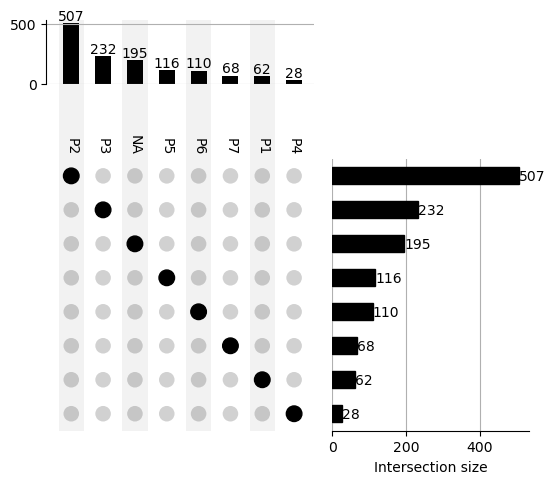

In [507]:
# Filter BGCs present in 2 to 6 groups and keep top n intersections 
df_filtered = df_binary[df_binary.sum(axis=1) == 1]

# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_filtered.astype(bool)))

# This will sort by size of intersections and only show the top 10
ax = plot(df_multi_index, subset_size='count', show_counts=True, orientation="vertical")
plt.savefig("assets/figures/upset_gcfs_1.svg")
plt.savefig("assets/figures/upset_gcfs_1.png")
plt.show()

In [627]:
replace_known_dict = {"surugamide A/surugamide D": "surugamide",
                      "leupeptin Pr/leupeptin Ac": "leupeptin",
                      "diisonitrile antibiotic SF2768": "SF2768",
                      "isatropolone A/isotropolone B/isotropolone C": "isatropolone",
                      "montamide A/capsimycin/clifednamide A/frontalamide A/combamide A": "montamide",
                      "legonoxamine A/desferrioxamine B/legonoxamine B": "desferrioxamine",
                      "SGR PTMs/SGR PTM Compound b/SGR PTM Compound c/SGR PTM Compound d": "SGR PTM",
                      "5-dimethylallylindole-3-acetonitrile" : "5-DMAIAN",
                      "flaviolin/1,3,6,8-tetrahydroxynaphthalene": "flaviolin",
                     "rhizomide A/rhizomide B/rhizomide C": "rhizomide",
                     "10,11-dihydro-8-deoxy-12,13-deepoxy-12,13-dihydrochalcomycin": "dihydrochalcomycin",
                     "fuelimycin A/fuelimicin B/fuelimicin C": "fuelimycin",
                     "desferrioxamin B/desferrioxamine E": "desferrioxamine",
                     "desferrioxamin B": "desferrioxamine",
                     "desferrioxamine E": "desferrioxamine",
                     "linearmycin A/linearmycin B/linearmycin C/linearmycin C": "linearmycin",
                     "youssoufene A1/youssoufene B1/youssoufene B2/youssoufene B3/youssoufene B4": "youssoufene",
                     "maduralactomycin A/maduralactomycin B/actinospirol A/actinospirol B": "maduralactomycin",
                     "10-epi-HSAF/10-epi-3-deOH-HSAF/10-epi-maltophilin/10-epi-xanthobaccin C/10-epi-hydroxymaltophilin/10-epi-FI-2": "10-epi-HSAF",
                     "montamide A/capsimycin/clifednamide A/frontalamide A/combamide A": "montamide",
                     "divergolide A/divergolide B/divergolide C/divergolide D":"divergolide",
                     "detoxin P1/detoxin P2/detoxin P3":"detoxin",
                      "CDA1b/CDA2a/CDA2b/CDA3a/CDA3b/CDA4a/CDA4": "CDA",
                      "echoside A/echoside B/echoside C/echoside D/echoside E": "echoside",
                      "salinamide A/salinamide B/salinamide C/salinamide D/salinamide E/salinamide F/desmethylsalinamide C/desmethylsalinamide E": "salinamide",
                      "ilamycin B1/ilamycin B2/ilamycin C1/ilamycin C2/ilamycin D/ilamycin E1": "ilamycin",
                      "saccharothrixin D/saccharothrixin E/saccharothrixin F/saccharothrixin G/saccharothrixin H/saccharothrixin I/saccharothrixin J/saccharothrixin K/saccharothrixin L/saccharothrixin M": "saccharothrixin",
                      "rubiginone A2/rubiginone J/rubiginone K/rubiginone L/rubiginone M/rubiginone N/ochromycinone/rubiginone B2": "rubiginone",
                      }

<Figure size 2000x4000 with 0 Axes>

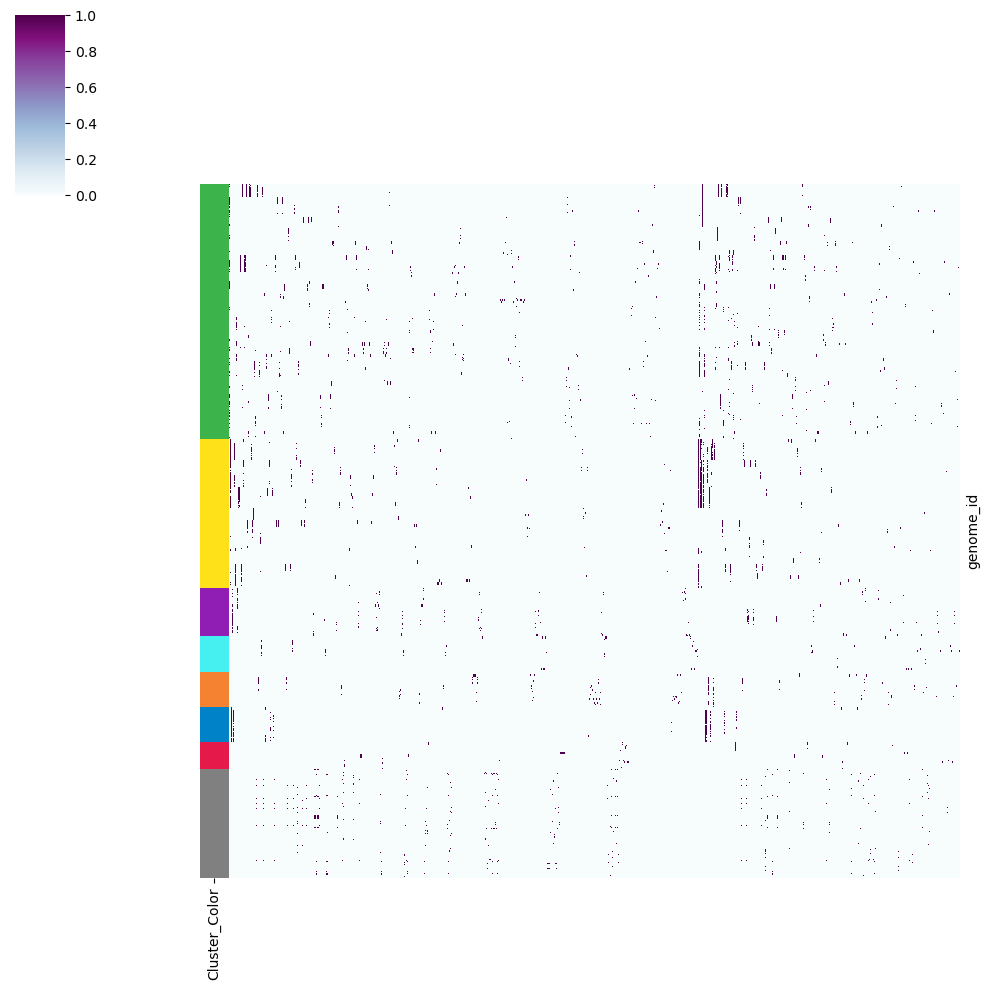

In [497]:
df_filtered = df_binary[df_binary.sum(axis=1) == 1]

df_gcf_unique = df_gcfs_bigslice.loc[df_filtered.index,:]

df_gcf_unique = df_gcf_unique.sort_values(by=["known", "count", "top_known_cluster_name"], ascending=False)

df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color"]]
df_heatmap = df_gcf_presence.loc[df_clusters.index, df_gcf_unique.index]
df_heatmap.columns = [mibig if mibig not in replace_knonw_dict.keys() else replace_knonw_dict[mibig] for mibig in df_gcf_unique.top_known_cluster_name]
plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=False, yticklabels=False)
plt.savefig("assets/figures/Figure_3/bigslice_present_unique.png")

<Figure size 2000x4000 with 0 Axes>

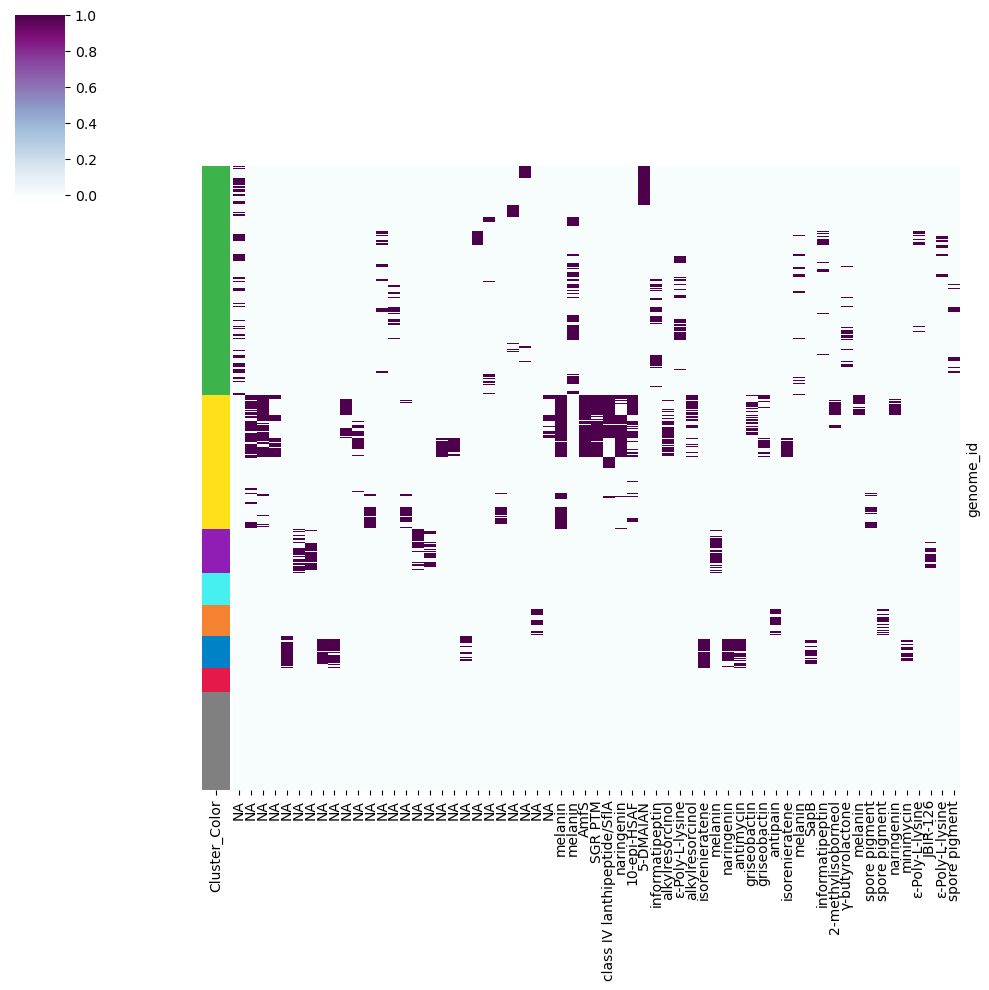

In [505]:
# Reduce GCFs to those with more than 50 BGCs
df_gcf_unique_red = df_gcf_unique[df_gcf_unique["count"] > 50]
df_heatmap = df_gcf_presence.loc[df_clusters.index, df_gcf_unique_red.index]
df_heatmap.columns = [mibig if mibig not in replace_known_dict.keys() else replace_known_dict[mibig] for mibig in df_gcf_unique_red.top_known_cluster_name]
plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=True, yticklabels=False)
plt.savefig("assets/figures/Figure_3/bigslice_present_unique_reduced.png")

# Combining GCFs with antiSMAHS knownclusterblast 

In [78]:
df_gcfs_bigslice["gcf_combined"] = df_gcfs_bigslice.index
df_bgcs_bigslice["gcf_combined"] = [str(gcf_id) for gcf_id in df_bgcs_bigslice.gcf_id]
df_gcfs_bigslice["gcf_combined_id"] = df_gcfs_bigslice.index
df_bgcs_bigslice["gcf_combined_id"] = [str(gcf_id) for gcf_id in df_bgcs_bigslice.gcf_id]

list_curate = []
for gcf_id in df_gcfs_bigslice.index:
    if df_gcfs_bigslice.loc[gcf_id, "known"] == "Known":
        select_bgcs = df_bgcs_bigslice[df_bgcs_bigslice.gcf_id == int(gcf_id)].index
        known_bgc = df_gcfs_bigslice.loc[gcf_id, "top_known_cluster_name"]
        known_bgc_id = df_gcfs_bigslice.loc[gcf_id, "top_known_cluster_id"]
        known_bgc_cat = df_gcfs_bigslice.loc[gcf_id, "top_known_cluster_category"]
        
        df_gcfs_bigslice.loc[gcf_id, "gcf_combined_id"] = known_bgc_id
        df_bgcs_bigslice.loc[select_bgcs, "gcf_combined_id"] = known_bgc_id

        if known_bgc in replace_known_dict.keys():
            df_gcfs_bigslice.loc[gcf_id, "gcf_combined"] = replace_known_dict[known_bgc]
            df_bgcs_bigslice.loc[select_bgcs, "gcf_combined"] = replace_known_dict[known_bgc]
        else:
            df_gcfs_bigslice.loc[gcf_id, "gcf_combined"] = known_bgc
            df_bgcs_bigslice.loc[select_bgcs, "gcf_combined"] = known_bgc
            if len(known_bgc) > 15:
                if known_bgc not in list_curate:
                    list_curate.append(known_bgc)

In [118]:
df_gcfs_bigslice_combined = pd.DataFrame(index=df_gcfs_bigslice.gcf_combined_id.unique(), 
                                        columns=["bigslice_gcf_count", "bgc_count", "known", 
                            "known_cluster_count", "known_clusters_id", "top_known_cluster_id", 
                            "top_known_cluster_name", "top_known_cluster_category", 
                            "top_known_cluster_type", "gcf_combined_name", "gcf_combined_id"])
for gcf_combined_id in df_gcfs_bigslice_combined.index:
    df_gcfs_selected = df_gcfs_bigslice[df_gcfs_bigslice.gcf_combined_id == gcf_combined_id]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "bigslice_gcf_count"] = df_gcfs_selected.shape[0]
    
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "bgc_count"] = df_gcfs_selected["count"].sum()
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "known"] = df_gcfs_selected["known"].unique()[0]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "top_known_cluster_id"] = df_gcfs_selected["top_known_cluster_id"].unique()[0]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "top_known_cluster_name"] = df_gcfs_selected["top_known_cluster_name"].unique()[0]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "top_known_cluster_category"] = df_gcfs_selected["top_known_cluster_category"].unique()[0]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "top_known_cluster_type"] = df_gcfs_selected["top_known_cluster_type"].unique()[0]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "gcf_combined_name"] = df_gcfs_selected["gcf_combined"].unique()[0]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "gcf_combined_id"] = df_gcfs_selected["gcf_combined_id"].unique()[0]
    
    known_clusters_id_str = ",".join(df_gcfs_selected["known_clusters_id"].unique())
    known_clusters_id_list = set(known_clusters_id_str.split(","))
    known_clusters_id = ",".join(known_clusters_id_list)
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "known_clusters_id"] = known_clusters_id
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "known_cluster_count"] = len(known_clusters_id_list)
    
df_gcfs_bigslice_combined.sort_values(by="bgc_count", ascending=False, inplace=True)    

# Combine different MIBIG entries coding for similar compounds
gcf_combined_name_counts = df_gcfs_bigslice_combined.gcf_combined_name.value_counts()
replace_mibig_list = gcf_combined_name_counts[gcf_combined_name_counts > 1].index.tolist()

for mibig_name in replace_mibig_list:
    df_gcfs_bigslice_combined_selected = df_gcfs_bigslice_combined[df_gcfs_bigslice_combined.gcf_combined_name == mibig_name]
    df_gcfs_bigslice_selected = df_gcfs_bigslice[df_gcfs_bigslice.gcf_combined == mibig_name]
    df_bgcs_bigslice_selected = df_bgcs_bigslice[df_bgcs_bigslice.gcf_combined == mibig_name]

    selected_gcf_id = df_gcfs_bigslice_combined_selected.gcf_combined_id[0]
    df_bgcs_bigslice.loc[df_bgcs_bigslice_selected.index, "gcf_combined_id"] = selected_gcf_id
    df_gcfs_bigslice.loc[df_gcfs_bigslice_selected.index, "gcf_combined_id"] = selected_gcf_id

df_gcfs_bigslice_combined = pd.DataFrame(index=df_gcfs_bigslice.gcf_combined_id.unique(), 
                                        columns=["bigslice_gcf_count", "bgc_count", "known", 
                            "known_cluster_count", "known_clusters_id", "top_known_cluster_id", 
                            "top_known_cluster_name", "gcf_combined_name", "gcf_combined_id"])
for gcf_combined_id in df_gcfs_bigslice_combined.index:
    df_gcfs_selected = df_gcfs_bigslice[df_gcfs_bigslice.gcf_combined_id == gcf_combined_id]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "bigslice_gcf_count"] = df_gcfs_selected.shape[0]
    
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "bgc_count"] = df_gcfs_selected["count"].sum()
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "known"] = df_gcfs_selected["known"].unique()[0]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "top_known_cluster_id"] = df_gcfs_selected["top_known_cluster_id"].unique()[0]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "top_known_cluster_name"] = df_gcfs_selected["top_known_cluster_name"].unique()[0]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "top_known_cluster_category"] = df_gcfs_selected["top_known_cluster_category"].unique()[0]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "top_known_cluster_type"] = df_gcfs_selected["top_known_cluster_type"].unique()[0]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "gcf_combined_name"] = df_gcfs_selected["gcf_combined"].unique()[0]
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "gcf_combined_id"] = df_gcfs_selected["gcf_combined_id"].unique()[0]
    
    known_clusters_id_str = ",".join(df_gcfs_selected["known_clusters_id"].unique())
    known_clusters_id_list = set(known_clusters_id_str.split(","))
    known_clusters_id = ",".join(known_clusters_id_list)
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "known_clusters_id"] = known_clusters_id
    df_gcfs_bigslice_combined.loc[gcf_combined_id, "known_cluster_count"] = len(known_clusters_id_list)
    
df_gcfs_bigslice_combined.sort_values(by="bgc_count", ascending=False, inplace=True)    

In [82]:
df_gcf_presence_combined_all = pd.DataFrame(0, index=df_clusters.index, columns=df_gcfs_bigslice_combined.index)
for gcf_id in df_gcf_presence_combined_all.columns:
    genome_list = df_bgcs_bigslice[df_bgcs_bigslice.gcf_combined_id == str(gcf_id)].genome_id.tolist()
    for genome_id in genome_list:
        if genome_id in df_gcf_presence_combined_all.index:
            df_gcf_presence_combined_all.loc[genome_id, gcf_id] = df_gcf_presence_combined_all.loc[genome_id, gcf_id] + 1

In [83]:
df_gcf_presence_combined_all.to_csv(processed_dir_1 / "bigslice" / "cluster_as_7.0.0" / "df_gcf_presence_combined.csv")
df_gcfs_bigslice.to_csv(processed_dir_1 / "bigslice" / "cluster_as_7.0.0" / "df_gcfs_curated_with_combined.csv")
df_gcfs_bigslice_combined.to_csv(processed_dir_1 / "bigslice" / "cluster_as_7.0.0" / "df_gcfs_combined.csv") 
df_bgcs_bigslice.to_csv(processed_dir_1 / "bigslice" / "cluster_as_7.0.0" / "df_bgcs_curated_with_combined.csv")

# Phylogroup specific distribution of known GCFs

In [159]:
df_gcfs_bigslice_combined_known = df_gcfs_bigslice_combined[df_gcfs_bigslice_combined.known == "Known"]
df_gcf_presence_combined = df_gcf_presence_combined_all.loc[df_clusters.index, df_gcfs_bigslice_combined_known.index]

/tmp/ipykernel_84879/3410909953.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Cluster_label.fillna("NA",inplace=True)


<Figure size 1500x1000 with 0 Axes>

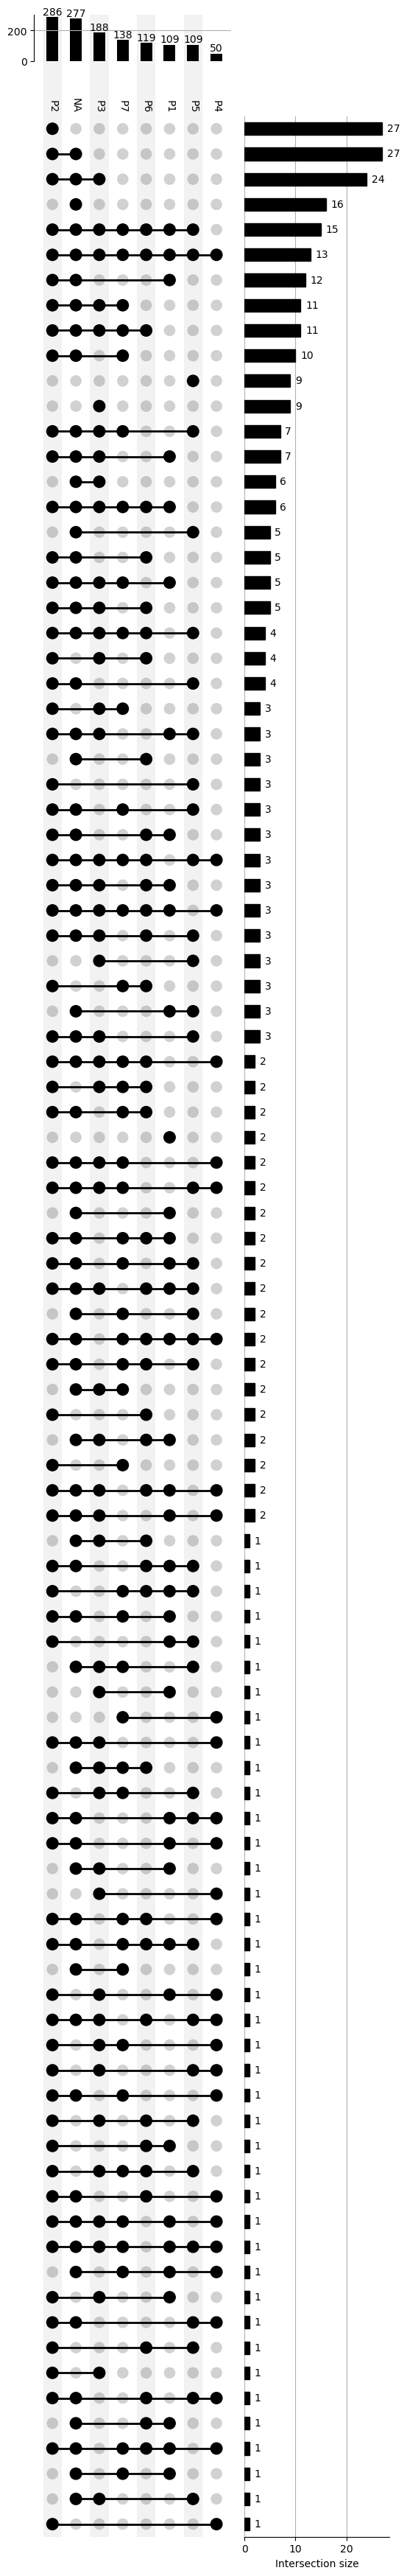

In [160]:
# Melt the dataframe
df_gcf_presence_tmp = df_gcf_presence_combined.loc[:, df_gcfs_bigslice_combined_known[df_gcfs_bigslice_combined_known["bgc_count"] > 5].index]
df_gcf_presence_tmp["genome_id"] = df_gcf_presence_tmp.index
df1 = df_gcf_presence_tmp.melt(id_vars=["genome_id"], value_vars=df_gcf_presence_tmp.columns[:-1],
                               var_name="BGC",
                               value_name="presence")
df2 = df_clusters[["Cluster_label"]]
df2.Cluster_label.fillna("NA",inplace=True)
# Merging dataframes
df = df1.merge(df2, on='genome_id')

# Creating a pivot table
pivot_table = df.pivot_table(index='BGC', columns='Cluster_label', values='presence', aggfunc='sum').fillna(0)

df_binary = (pivot_table > 0).astype(int)

# Convert the wide DataFrame to a long one
df_long = df_binary.reset_index().melt(id_vars='BGC', value_name='presence')
# Filter out entries where presence is 0
df_long = df_long[df_long.presence == 1]

# Create a boolean matrix representation
df_bool = pd.crosstab(df_long['BGC'], df_long['Cluster_label'])

# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_bool.astype(bool)))

# Manually set the colors
plt.figure(figsize=(15, 10))

ax = plot(df_multi_index, subset_size='count', sort_by="cardinality", show_counts=True, orientation="vertical")
# plt.savefig("assets/figures/upset_gcfs.svg")
# plt.savefig("assets/figures/upset_gcfs.png")
plt.show()

## Common GCF spread across 6 or more phylogroups

<Figure size 1500x1000 with 0 Axes>

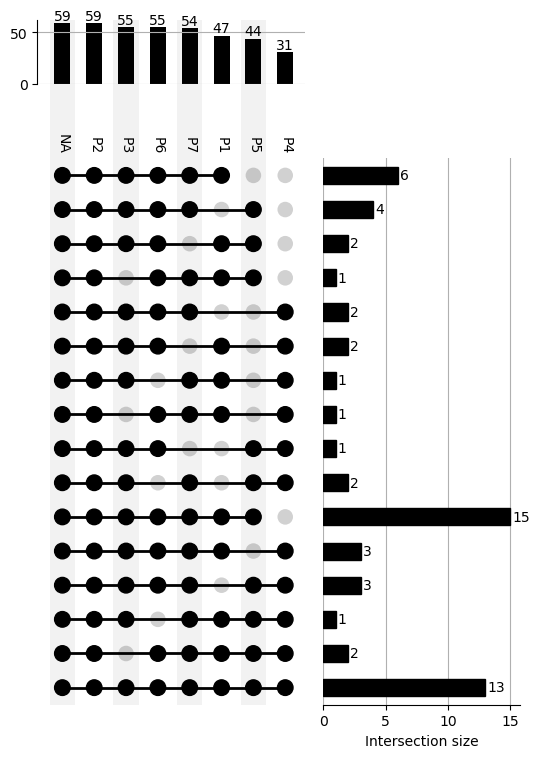

In [161]:
# Filter rows that are present in more than 6 groups
df_filtered = df_binary[df_binary.sum(axis=1) >= 6]


# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_filtered.astype(bool)))

# Manually set the colors
plt.figure(figsize=(15, 10))

ax = plot(df_multi_index, subset_size='count', show_counts=True, orientation="vertical")
# plt.savefig("assets/figures/upset_gcfs_6_and_above.svg")
# plt.savefig("assets/figures/upset_gcfs_6_and_above.png")
plt.show()

/datadrive/apps/anaconda3/envs/python_notebook/lib/python3.9/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


<Figure size 2000x4000 with 0 Axes>

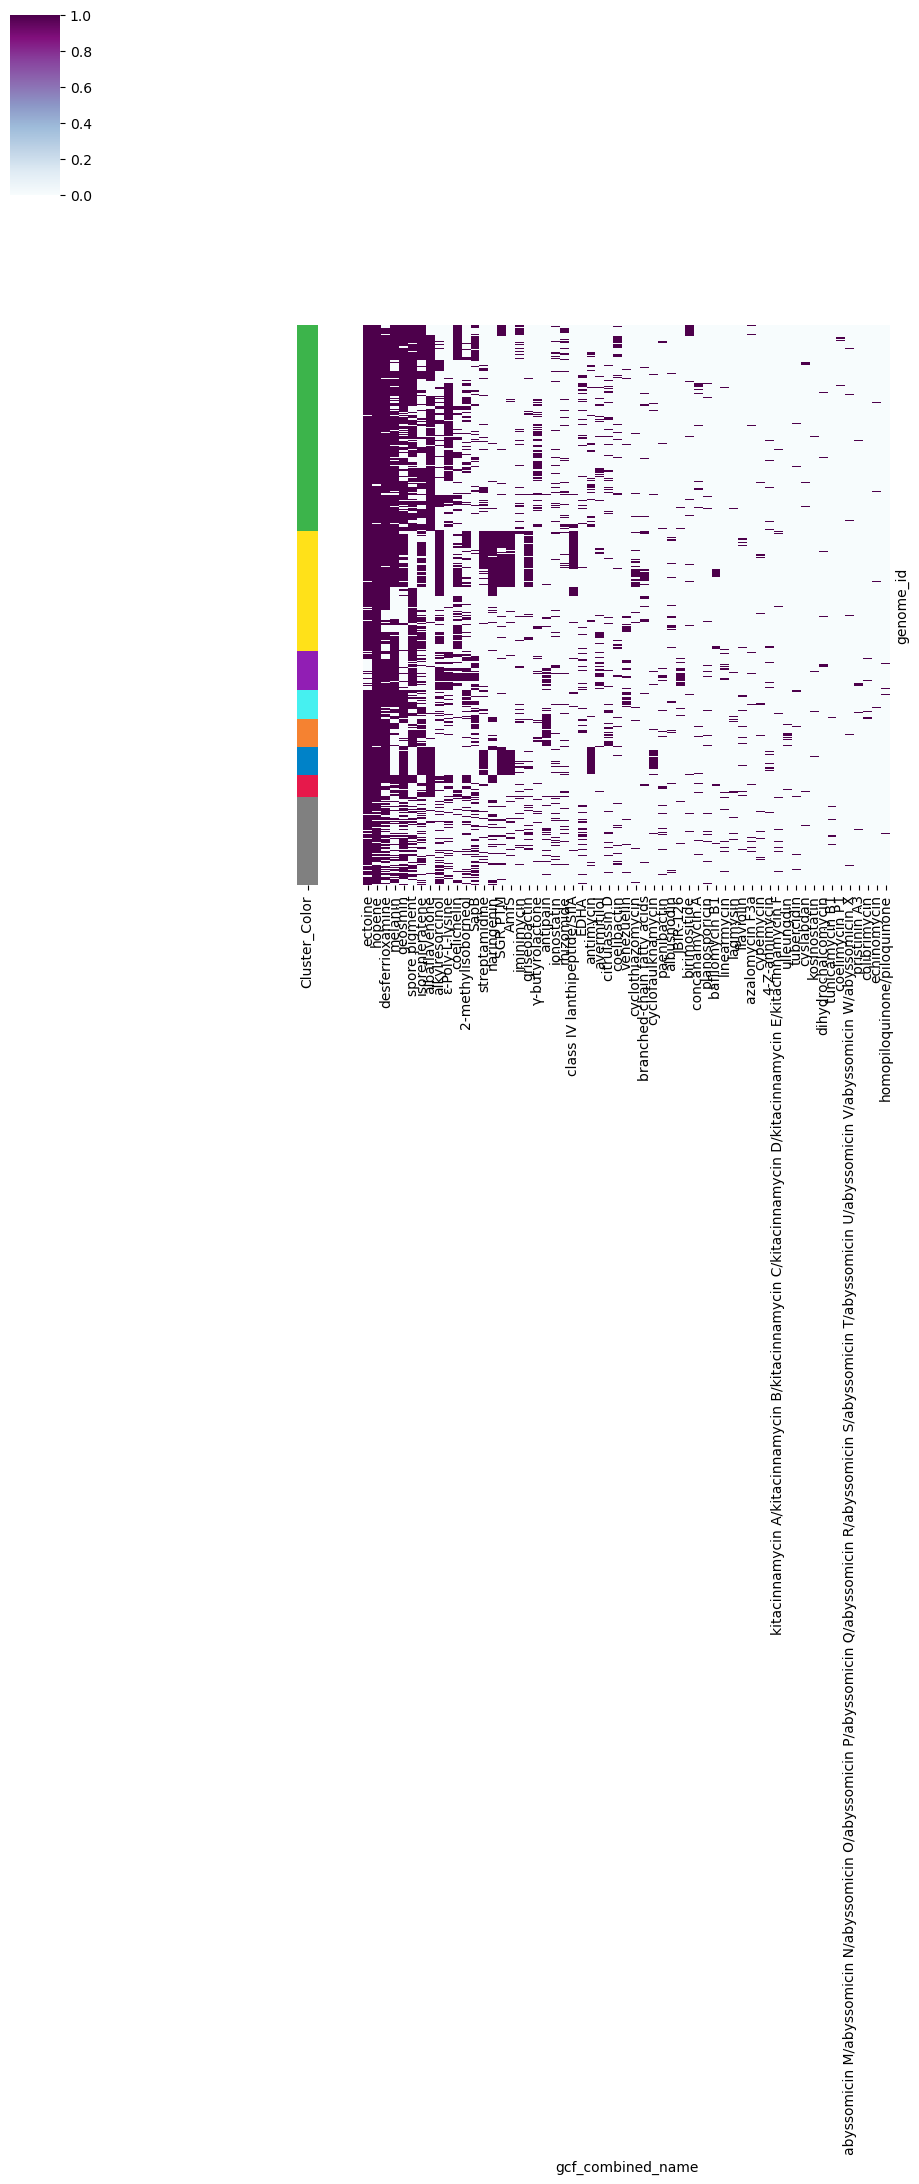

In [162]:
df_filtered = df_binary[df_binary.sum(axis=1) >= 6]
df_gcf_common = df_gcfs_bigslice_combined_known.loc[df_filtered.index,:]
df_gcf_presence_common = df_gcf_presence_combined.loc[:, df_gcf_common.index]

df_gcf_common = df_gcf_common.sort_values(by=["known", "bgc_count", "top_known_cluster_name"], ascending=False)

df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color"]]
df_heatmap = df_gcf_presence_combined.loc[df_clusters.index, df_gcf_common.index]
df_heatmap = (df_heatmap > 0).astype(int) 
df_heatmap.columns = df_gcf_common.gcf_combined_name
plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=True, yticklabels=False)
# plt.savefig("assets/figures/Figure_3/bigslice_present_common.png")

## Accessory GCFs present in 2 to 5 phylogroups (most significant intersections selected)

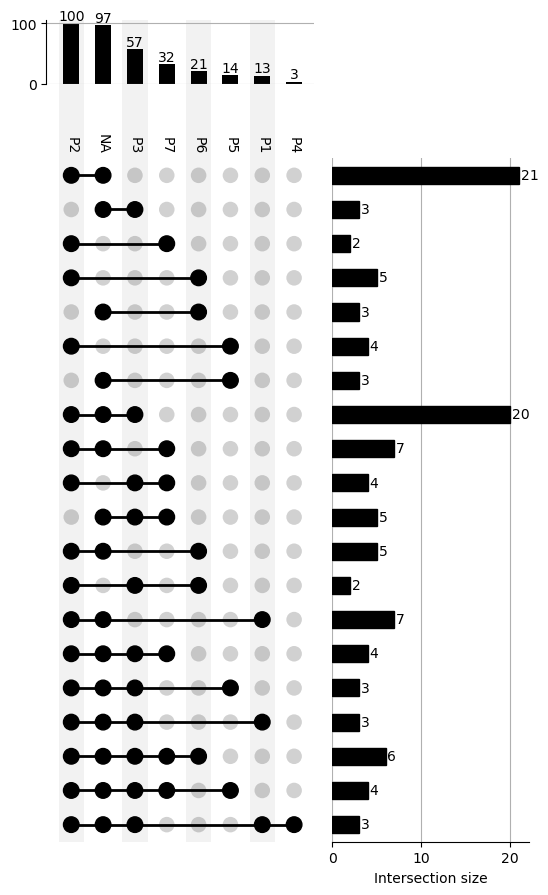

In [60]:
# Filter BGCs present in 2 to 6 groups and keep top n intersections 
df_filtered = df_binary[(df_binary.sum(axis=1) > 1) & (df_binary.sum(axis=1) < 6)]

# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_filtered.astype(bool)))

# Calculate the size of each intersection
intersection_counts = df_multi_index.groupby(level=list(range(df_multi_index.index.nlevels))).size()

# Sort by size and keep the top n intersections
n = 20
top_intersections = intersection_counts.nlargest(n).index

# Filter df_multi_index to only include top intersections
df_multi_index_filtered = df_multi_index[df_multi_index.index.isin(top_intersections)]

# This will sort by size of intersections and only show the top 10
ax = plot(df_multi_index_filtered, subset_size='count', show_counts=True, orientation="vertical")
# plt.savefig("assets/figures/upset_gcfs_2_6.svg")
# plt.savefig("assets/figures/upset_gcfs_2_6.png")
plt.show()

<Figure size 2000x4000 with 0 Axes>

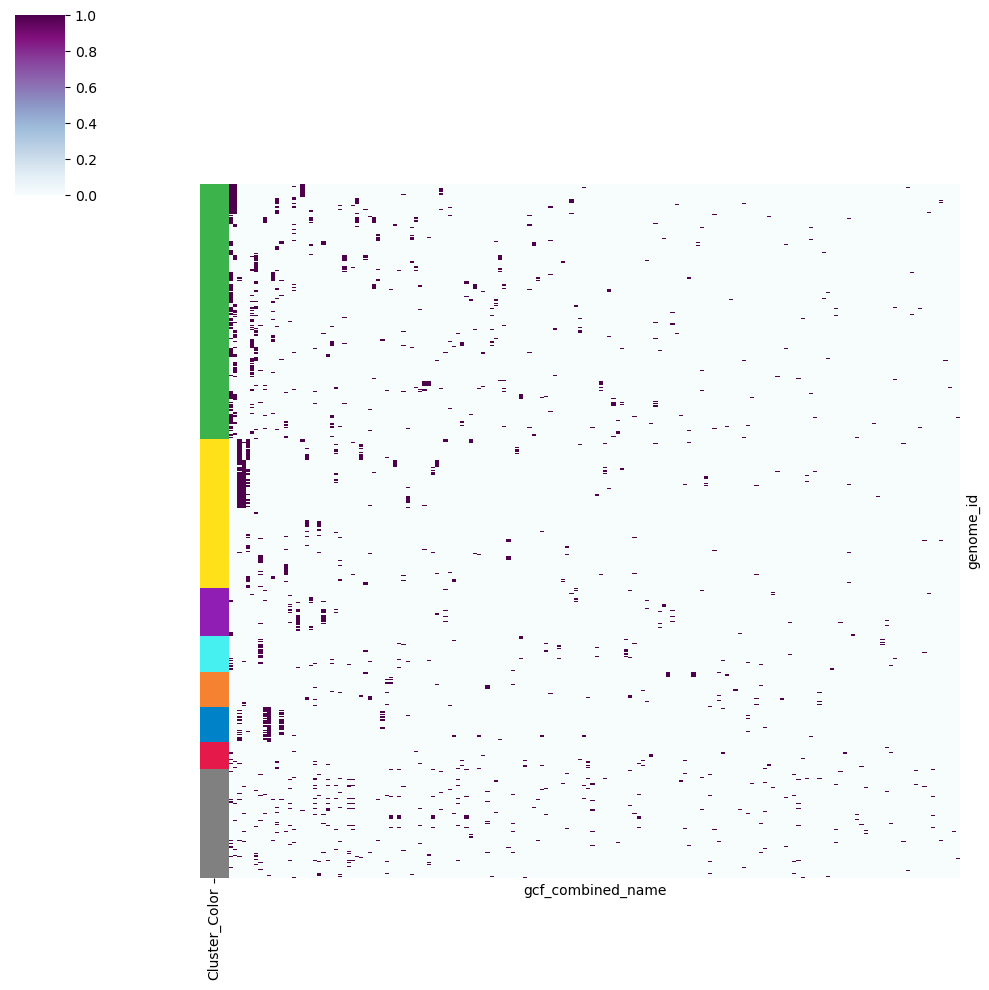

In [61]:
df_filtered = df_binary[(df_binary.sum(axis=1) > 1) & (df_binary.sum(axis=1) < 6)]

df_gcf_accessory = df_gcfs_bigslice_combined.loc[df_filtered.index,:]
df_gcf_presence_accessort = df_gcf_presence_combined.loc[:, df_gcf_accessory.index]

df_gcf_accessory = df_gcf_accessory.sort_values(by=["known", "bgc_count", "top_known_cluster_name"], ascending=False)

df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color"]]
df_heatmap = df_gcf_presence_combined.loc[df_clusters.index, df_gcf_accessory.index]
df_heatmap = (df_heatmap > 0).astype(int) 
df_heatmap.columns = df_gcf_accessory.gcf_combined_name

plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=False, yticklabels=False)
# plt.savefig("assets/figures/Figure_3/bigslice_present_accesory.png")

<Figure size 2000x4000 with 0 Axes>

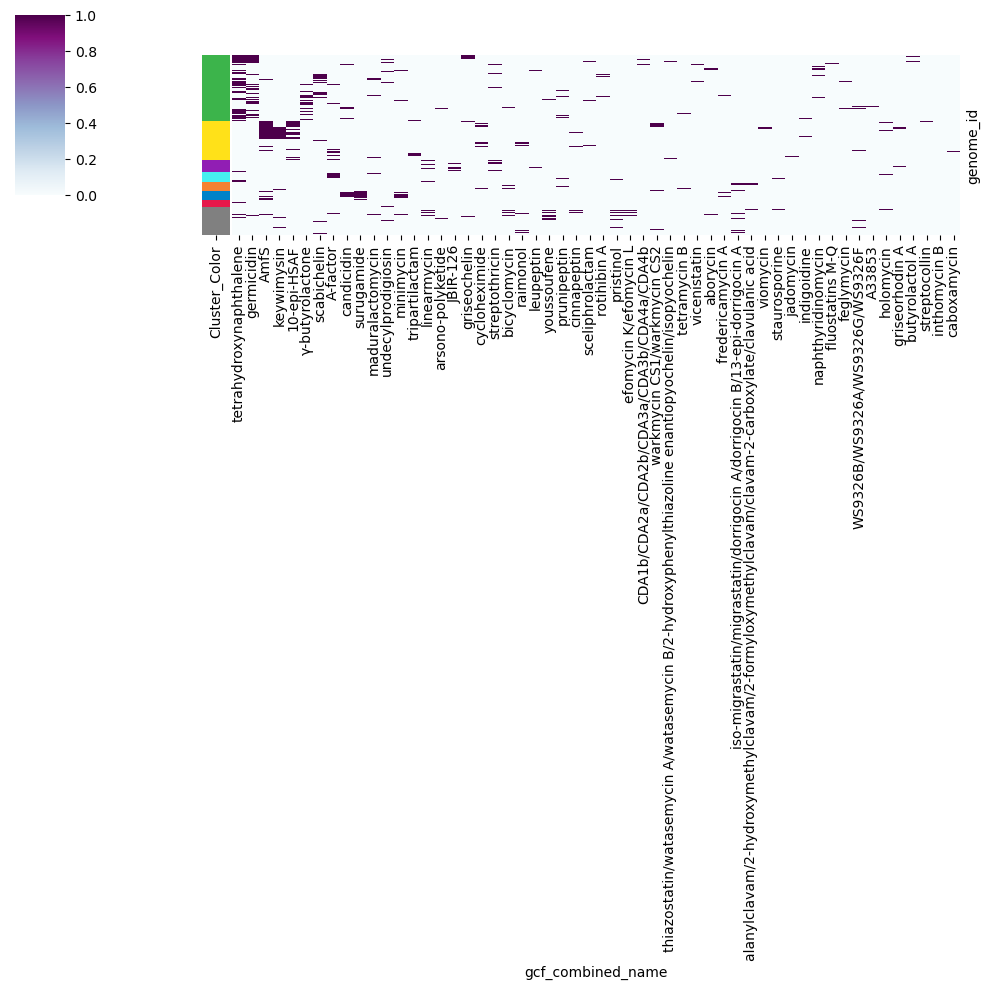

In [62]:
df_filtered = df_binary[(df_binary.sum(axis=1) > 1) & (df_binary.sum(axis=1) < 6)]

df_gcf_accessory = df_gcfs_bigslice_combined.loc[df_filtered.index,:]
df_gcf_accessory = df_gcf_accessory.sort_values(by=["known", "bgc_count", "top_known_cluster_name"], ascending=False)

df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color"]]

# Reduce GCFs to those with more than 50 BGCs
df_gcf_accessory_red = df_gcf_accessory[df_gcf_accessory["bgc_count"] > 30]
df_heatmap = df_gcf_presence_combined.loc[df_clusters.index, df_gcf_accessory_red.index]
df_heatmap = (df_heatmap > 0).astype(int) 
df_heatmap.columns = df_gcf_accessory_red.gcf_combined_name
plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=True, yticklabels=False)
# plt.savefig("assets/figures/Figure_3/bigslice_present_accesory_reduced.png")

## Unique GCFs present in 1 phylogroups

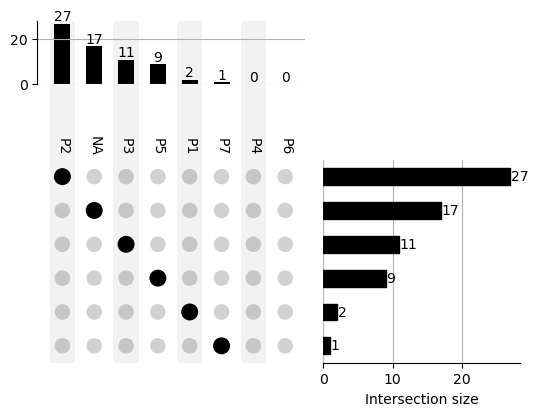

In [63]:
# Filter BGCs present in 2 to 6 groups and keep top n intersections 
df_filtered = df_binary[df_binary.sum(axis=1) == 1]

# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_filtered.astype(bool)))

# This will sort by size of intersections and only show the top 10
ax = plot(df_multi_index, subset_size='count', show_counts=True, orientation="vertical")
# plt.savefig("assets/figures/upset_gcfs_1.svg")
# plt.savefig("assets/figures/upset_gcfs_1.png")
plt.show()

/datadrive/apps/anaconda3/envs/python_notebook/lib/python3.9/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


<Figure size 2000x4000 with 0 Axes>

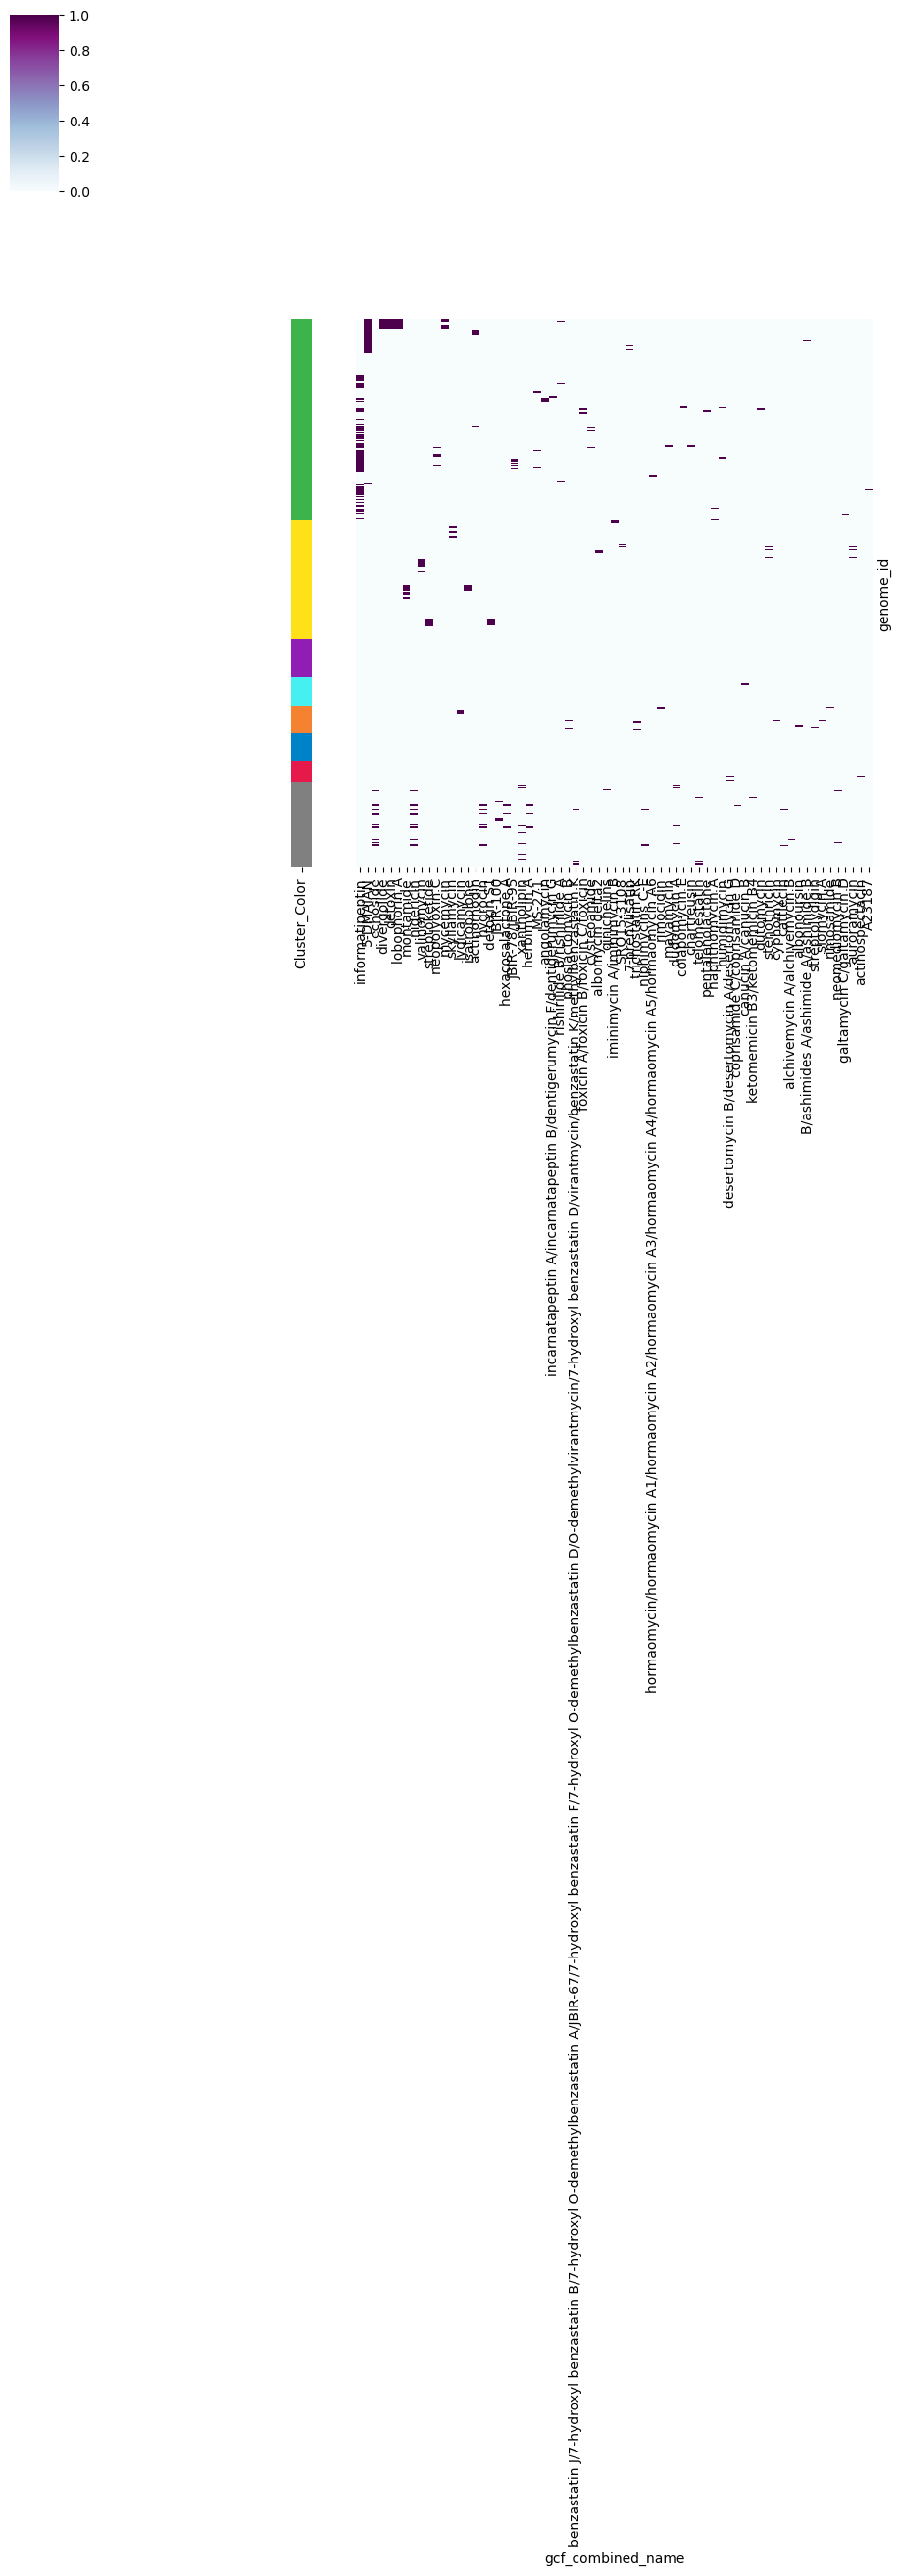

In [64]:
df_filtered = df_binary[df_binary.sum(axis=1) == 1]

df_gcf_unique = df_gcfs_bigslice_combined.loc[df_filtered.index,:]

df_gcf_unique = df_gcf_unique.sort_values(by=["known", "bgc_count", "top_known_cluster_name"], ascending=False)

df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color"]]
df_heatmap = df_gcf_presence_combined.loc[df_clusters.index, df_gcf_unique.index]
df_heatmap = (df_heatmap > 0).astype(int) 
df_heatmap.columns = df_gcf_unique.gcf_combined_name
plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=True, yticklabels=False)
# plt.savefig("assets/figures/Figure_3/bigslice_present_unique.png")

<Figure size 640x480 with 0 Axes>

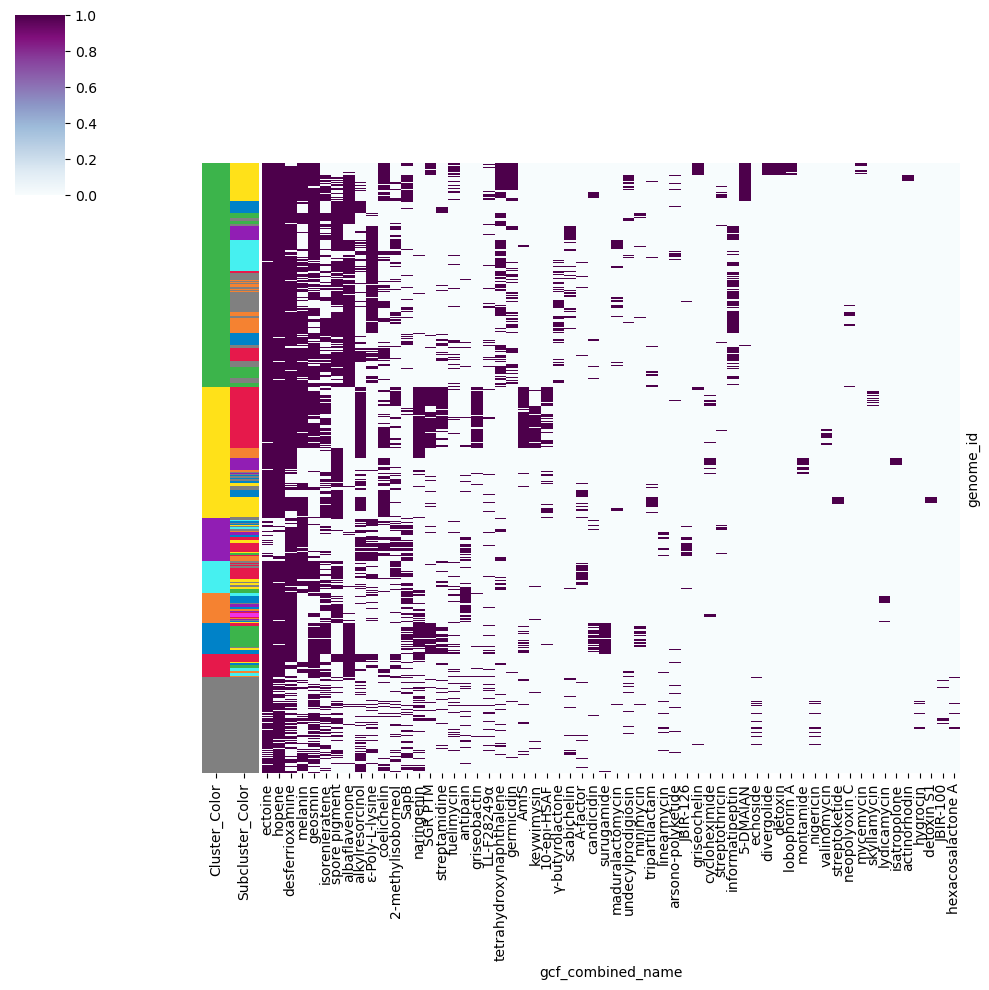

In [66]:
gcf_selected = df_gcf_common.index.tolist()[:20] + df_gcf_accessory.index.tolist()[:20] + df_gcf_unique.index.tolist()[:20]
df_gcf_selected = df_gcfs_bigslice_combined_known.loc[gcf_selected,:]
df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color", "Subcluster_Color"]]
df_heatmap = df_gcf_presence_combined.loc[df_clusters.index, df_gcf_selected.index]
df_heatmap = (df_heatmap > 0).astype(int) 
df_heatmap.columns = df_gcf_selected.gcf_combined_name
plt.figure()
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=True, yticklabels=False)
plt.savefig("assets/figures/Figure_3/known_BGCs_selected_genomes.pdf")

# Phylogroup specific distribution of unknown GCFs

In [67]:
df_gcfs_bigslice_combined_unknown = df_gcfs_bigslice_combined[df_gcfs_bigslice_combined.known == "Unknown"]
df_gcf_presence_combined = df_gcf_presence_combined_all.loc(df_clusters.index, df_gcfs_bigslice_combined_unknown.index)

/tmp/ipykernel_84879/4052653348.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Cluster_label.fillna("NA",inplace=True)


<Figure size 1500x1000 with 0 Axes>

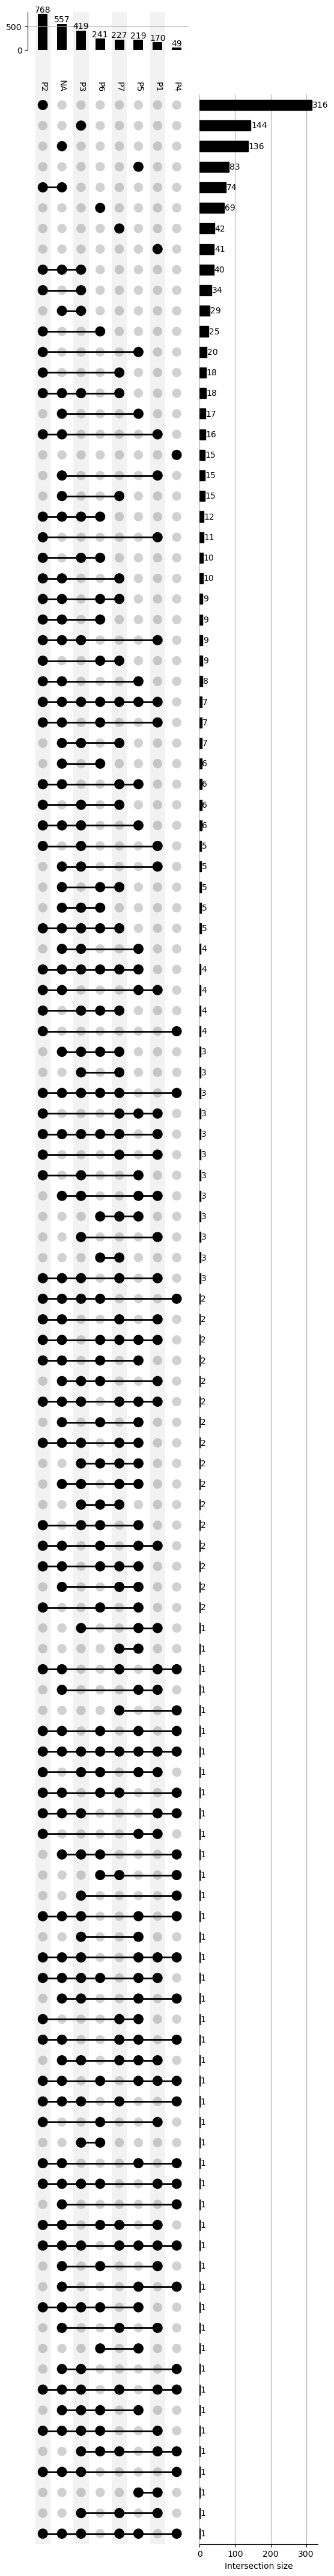

In [70]:
# Melt the dataframe
df_gcf_presence_tmp = df_gcf_presence_combined.loc[:, df_gcfs_bigslice_combined_unknown[df_gcfs_bigslice_combined_unknown["bgc_count"] > 5].index]
df_gcf_presence_tmp["genome_id"] = df_gcf_presence_tmp.index
df1 = df_gcf_presence_tmp.melt(id_vars=["genome_id"], value_vars=df_gcf_presence_tmp.columns[:-1],
                               var_name="BGC",
                               value_name="presence")
df2 = df_clusters[["Cluster_label"]]
df2.Cluster_label.fillna("NA",inplace=True)
# Merging dataframes
df = df1.merge(df2, on='genome_id')

# Creating a pivot table
pivot_table = df.pivot_table(index='BGC', columns='Cluster_label', values='presence', aggfunc='sum').fillna(0)

df_binary = (pivot_table > 0).astype(int)

# Convert the wide DataFrame to a long one
df_long = df_binary.reset_index().melt(id_vars='BGC', value_name='presence')
# Filter out entries where presence is 0
df_long = df_long[df_long.presence == 1]

# Create a boolean matrix representation
df_bool = pd.crosstab(df_long['BGC'], df_long['Cluster_label'])

# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_bool.astype(bool)))

# Manually set the colors
plt.figure(figsize=(15, 10))

ax = plot(df_multi_index, subset_size='count', sort_by="cardinality", show_counts=True, orientation="vertical")
# plt.savefig("assets/figures/upset_gcfs.svg")
# plt.savefig("assets/figures/upset_gcfs.png")
plt.show()

## Common GCF spread across 6 or more phylogroups

<Figure size 1500x1000 with 0 Axes>

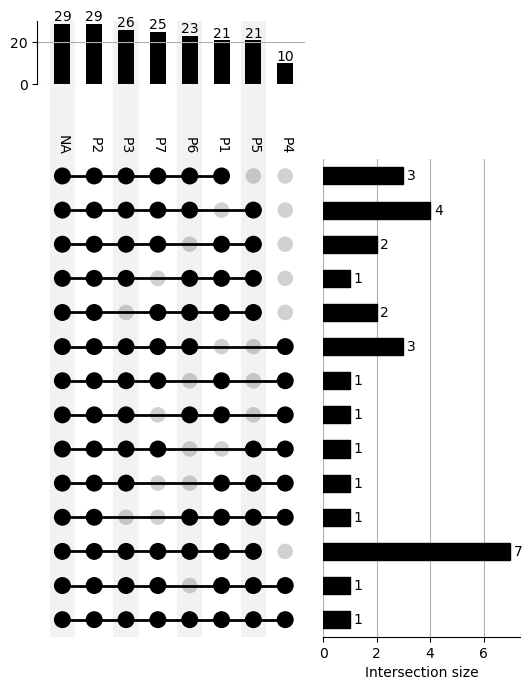

In [71]:
# Filter rows that are present in more than 6 groups
df_filtered = df_binary[df_binary.sum(axis=1) >= 6]


# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_filtered.astype(bool)))

# Manually set the colors
plt.figure(figsize=(15, 10))

ax = plot(df_multi_index, subset_size='count', show_counts=True, orientation="vertical")
# plt.savefig("assets/figures/upset_gcfs_6_and_above.svg")
# plt.savefig("assets/figures/upset_gcfs_6_and_above.png")
plt.show()

<Figure size 2000x4000 with 0 Axes>

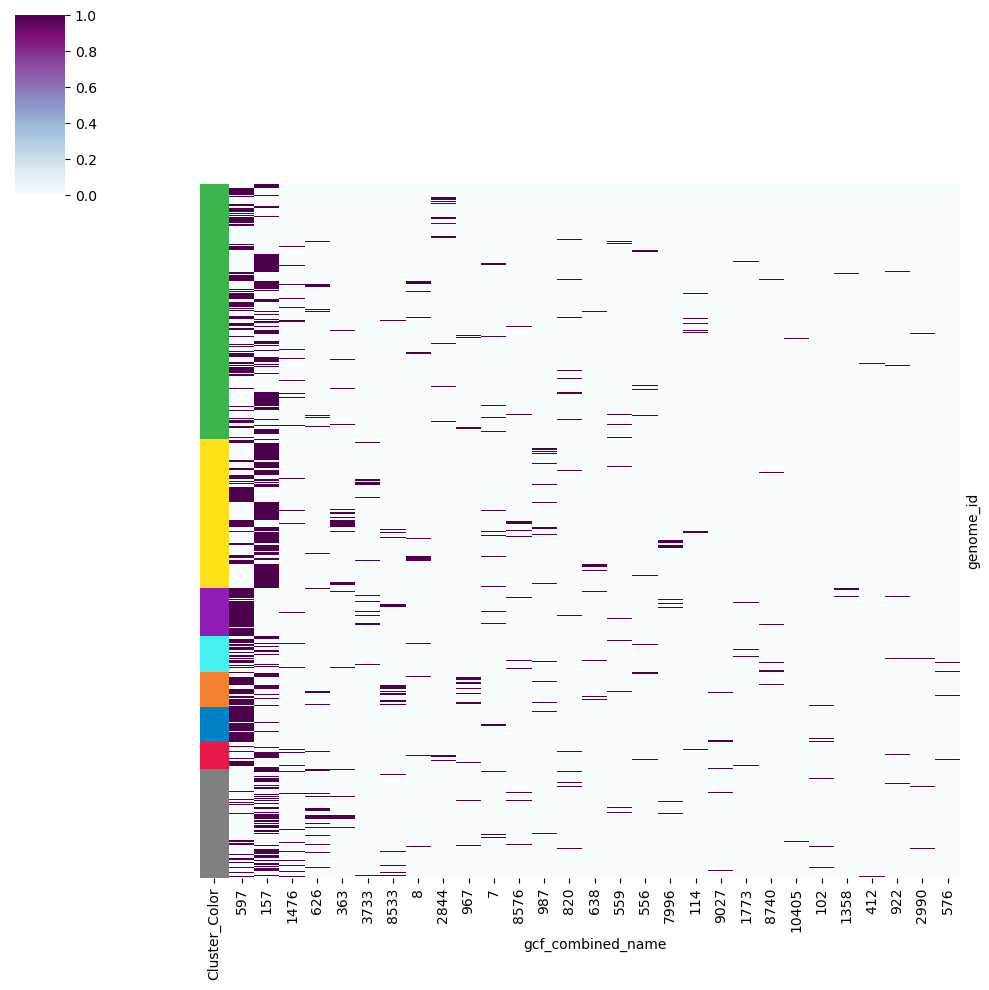

In [72]:
df_filtered = df_binary[df_binary.sum(axis=1) >= 6]
df_gcf_common = df_gcfs_bigslice_combined_unknown.loc[df_filtered.index,:]
df_gcf_presence_common = df_gcf_presence_combined.loc[:, df_gcf_common.index]

df_gcf_common = df_gcf_common.sort_values(by=["known", "bgc_count", "top_known_cluster_name"], ascending=False)

df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color"]]
df_heatmap = df_gcf_presence_combined.loc[df_clusters.index, df_gcf_common.index]
df_heatmap = (df_heatmap > 0).astype(int) 
df_heatmap.columns = df_gcf_common.gcf_combined_name
plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=True, yticklabels=False)
# plt.savefig("assets/figures/Figure_3/bigslice_present_common.png")

## Accessory GCFs present in 2 to 5 phylogroups (most significant intersections selected)

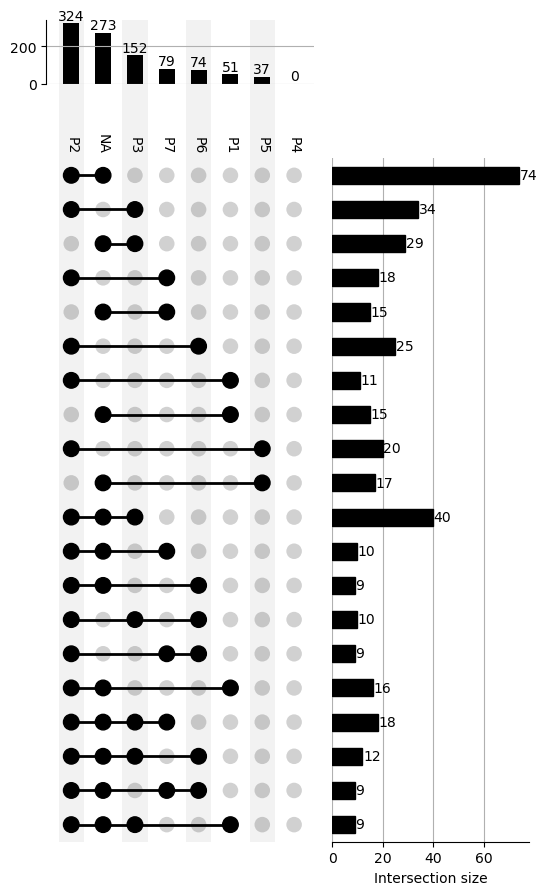

In [73]:
# Filter BGCs present in 2 to 6 groups and keep top n intersections 
df_filtered = df_binary[(df_binary.sum(axis=1) > 1) & (df_binary.sum(axis=1) < 6)]

# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_filtered.astype(bool)))

# Calculate the size of each intersection
intersection_counts = df_multi_index.groupby(level=list(range(df_multi_index.index.nlevels))).size()

# Sort by size and keep the top n intersections
n = 20
top_intersections = intersection_counts.nlargest(n).index

# Filter df_multi_index to only include top intersections
df_multi_index_filtered = df_multi_index[df_multi_index.index.isin(top_intersections)]

# This will sort by size of intersections and only show the top 10
ax = plot(df_multi_index_filtered, subset_size='count', show_counts=True, orientation="vertical")
# plt.savefig("assets/figures/upset_gcfs_2_6.svg")
# plt.savefig("assets/figures/upset_gcfs_2_6.png")
plt.show()

<Figure size 2000x4000 with 0 Axes>

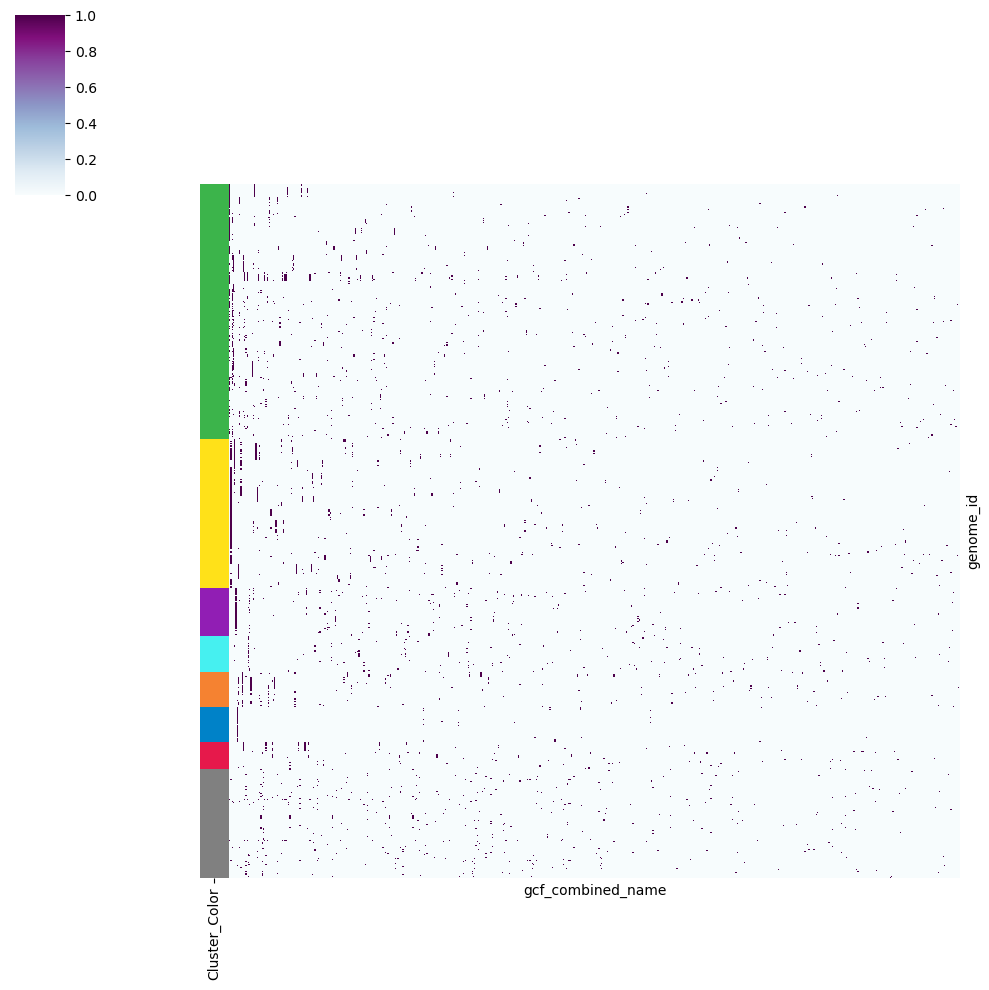

In [74]:
df_filtered = df_binary[(df_binary.sum(axis=1) > 1) & (df_binary.sum(axis=1) < 6)]

df_gcf_accessory = df_gcfs_bigslice_combined.loc[df_filtered.index,:]
df_gcf_presence_accessort = df_gcf_presence_combined.loc[:, df_gcf_accessory.index]

df_gcf_accessory = df_gcf_accessory.sort_values(by=["known", "bgc_count", "top_known_cluster_name"], ascending=False)

df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color"]]
df_heatmap = df_gcf_presence_combined.loc[df_clusters.index, df_gcf_accessory.index]
df_heatmap = (df_heatmap > 0).astype(int) 
df_heatmap.columns = df_gcf_accessory.gcf_combined_name

plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=False, yticklabels=False)
# plt.savefig("assets/figures/Figure_3/bigslice_present_accesory.png")

<Figure size 2000x4000 with 0 Axes>

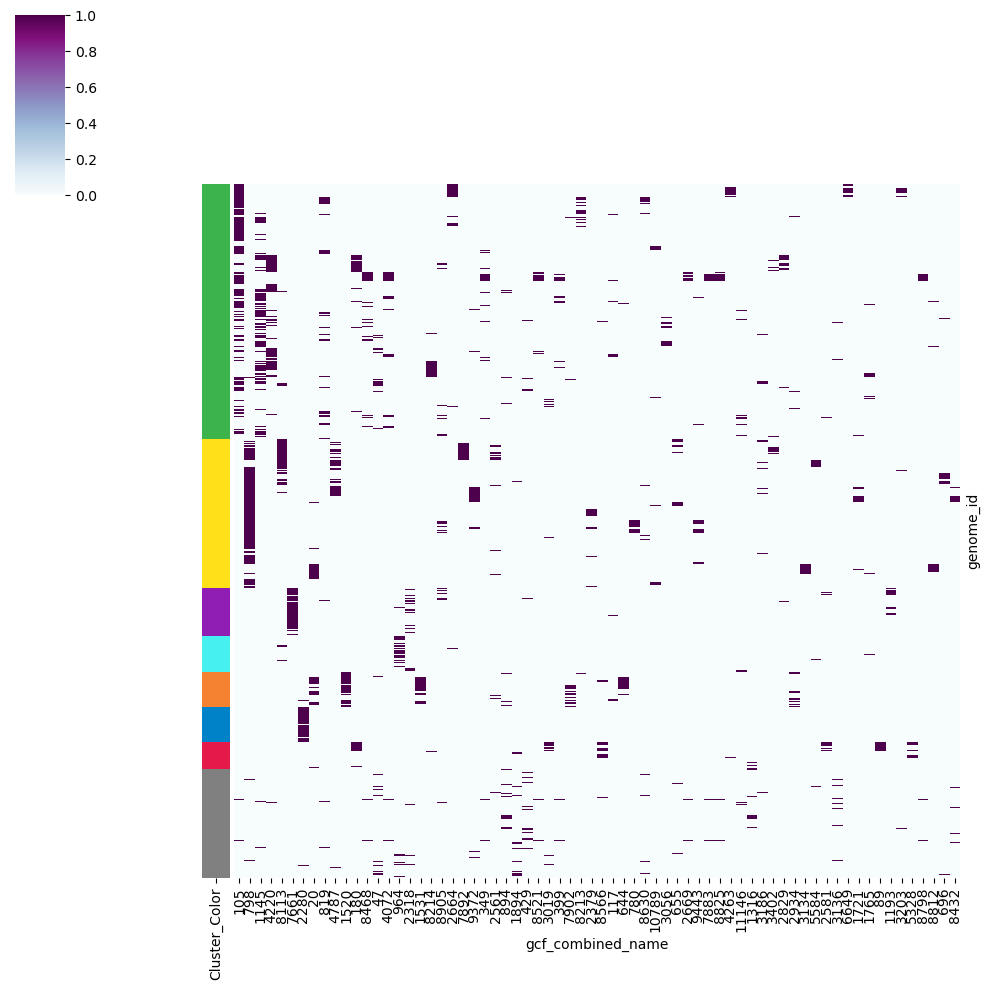

In [75]:
df_filtered = df_binary[(df_binary.sum(axis=1) > 1) & (df_binary.sum(axis=1) < 6)]

df_gcf_accessory = df_gcfs_bigslice_combined.loc[df_filtered.index,:]
df_gcf_accessory = df_gcf_accessory.sort_values(by=["known", "bgc_count", "top_known_cluster_name"], ascending=False)

df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color"]]

# Reduce GCFs to those with more than 50 BGCs
df_gcf_accessory_red = df_gcf_accessory[df_gcf_accessory["bgc_count"] > 30]
df_heatmap = df_gcf_presence_combined.loc[df_clusters.index, df_gcf_accessory_red.index]
df_heatmap = (df_heatmap > 0).astype(int) 
df_heatmap.columns = df_gcf_accessory_red.gcf_combined_name
plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=True, yticklabels=False)
# plt.savefig("assets/figures/Figure_3/bigslice_present_accesory_reduced.png")

## Unique GCFs present in 1 phylogroups

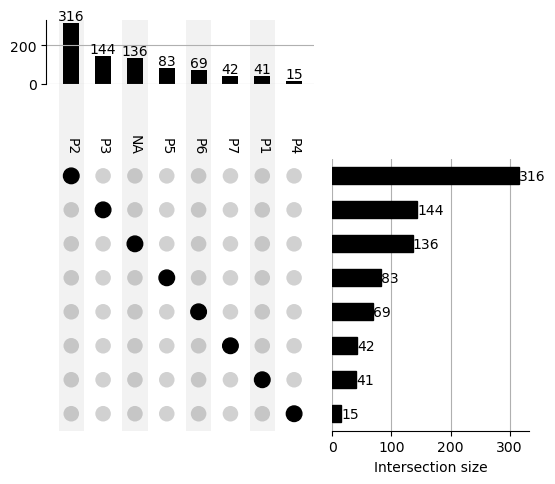

In [76]:
# Filter BGCs present in 2 to 6 groups and keep top n intersections 
df_filtered = df_binary[df_binary.sum(axis=1) == 1]

# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_filtered.astype(bool)))

# This will sort by size of intersections and only show the top 10
ax = plot(df_multi_index, subset_size='count', show_counts=True, orientation="vertical")
# plt.savefig("assets/figures/upset_gcfs_1.svg")
# plt.savefig("assets/figures/upset_gcfs_1.png")
plt.show()

<Figure size 2000x4000 with 0 Axes>

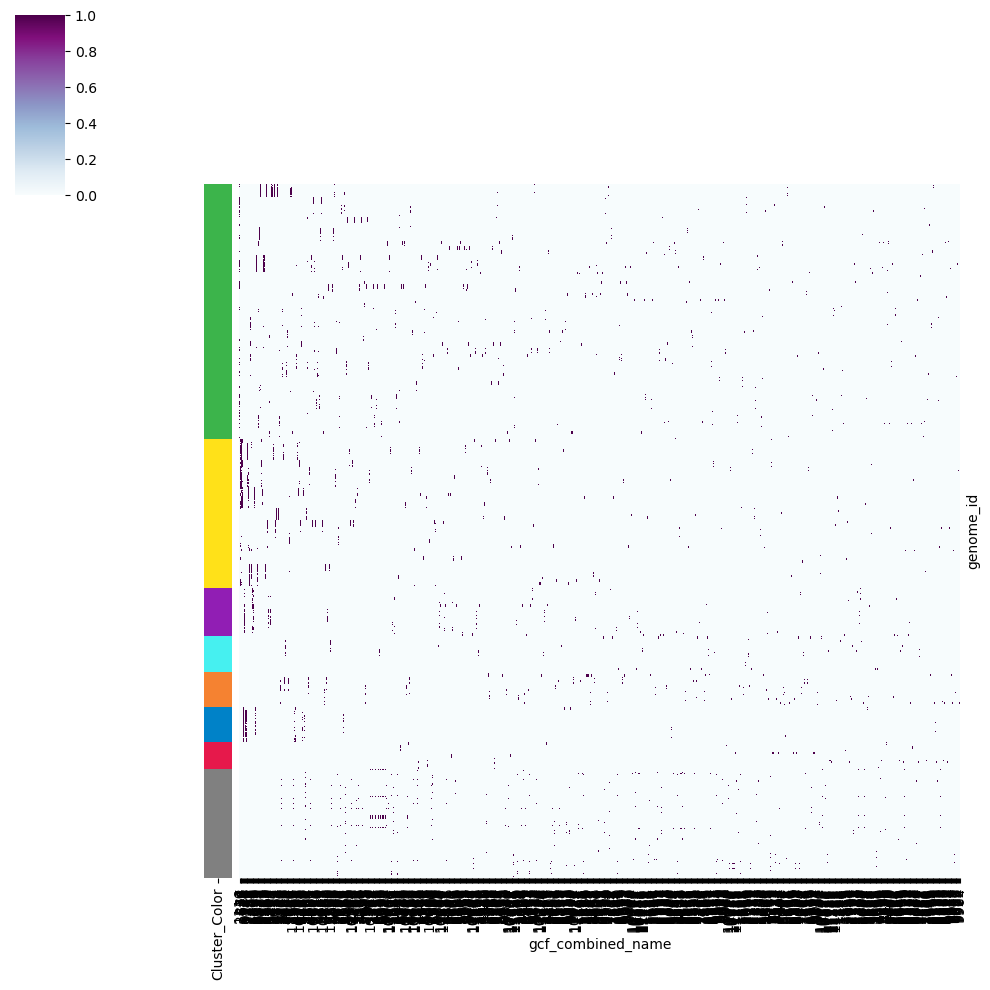

In [77]:
df_filtered = df_binary[df_binary.sum(axis=1) == 1]

df_gcf_unique = df_gcfs_bigslice_combined.loc[df_filtered.index,:]

df_gcf_unique = df_gcf_unique.sort_values(by=["known", "bgc_count", "top_known_cluster_name"], ascending=False)

df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color"]]
df_heatmap = df_gcf_presence_combined.loc[df_clusters.index, df_gcf_unique.index]
df_heatmap = (df_heatmap > 0).astype(int) 
df_heatmap.columns = df_gcf_unique.gcf_combined_name
plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=True, yticklabels=False)
# plt.savefig("assets/figures/Figure_3/bigslice_present_unique.png")

In [78]:
print(df_gcf_common.shape[0])
print(df_gcf_accessory.shape[0])
print(df_gcf_unique.shape[0])

29
582
846


<Figure size 640x480 with 0 Axes>

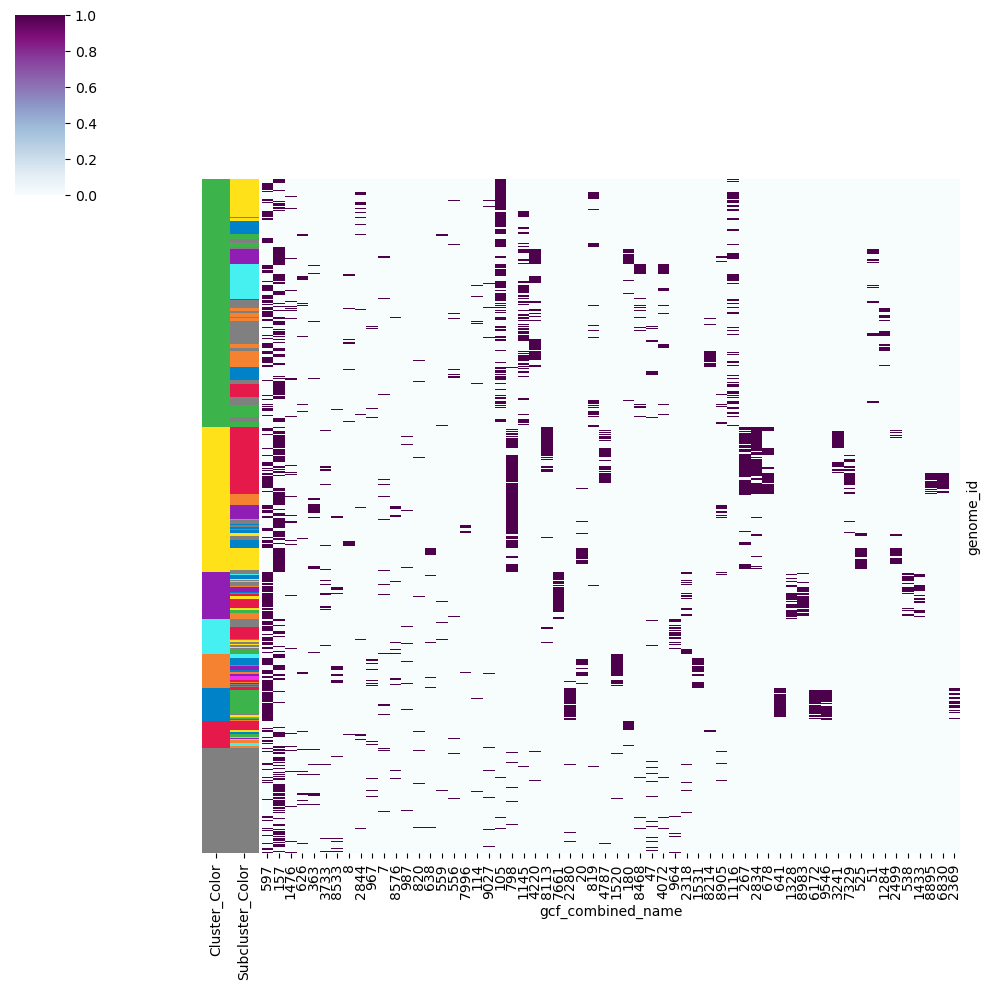

In [79]:
gcf_selected = df_gcf_common.index.tolist()[:20] + df_gcf_accessory.index.tolist()[:20] + df_gcf_unique.index.tolist()[:20]
df_gcf_selected = df_gcfs_bigslice_combined_unknown.loc[gcf_selected,:]
df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color", "Subcluster_Color"]]
df_heatmap = df_gcf_presence_combined.loc[df_clusters.index, df_gcf_selected.index]
df_heatmap = (df_heatmap > 0).astype(int) 
df_heatmap.columns = df_gcf_selected.gcf_combined_name
plt.figure()
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=True, yticklabels=False)
plt.savefig("assets/figures/Figure_3/unknown_BGCs_selected_genomes.pdf")

# All GCFs

In [81]:
df_gcf_presence_combined = df_gcf_presence_combined_all.copy()

/tmp/ipykernel_84879/1288785474.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Cluster_label.fillna("NA",inplace=True)


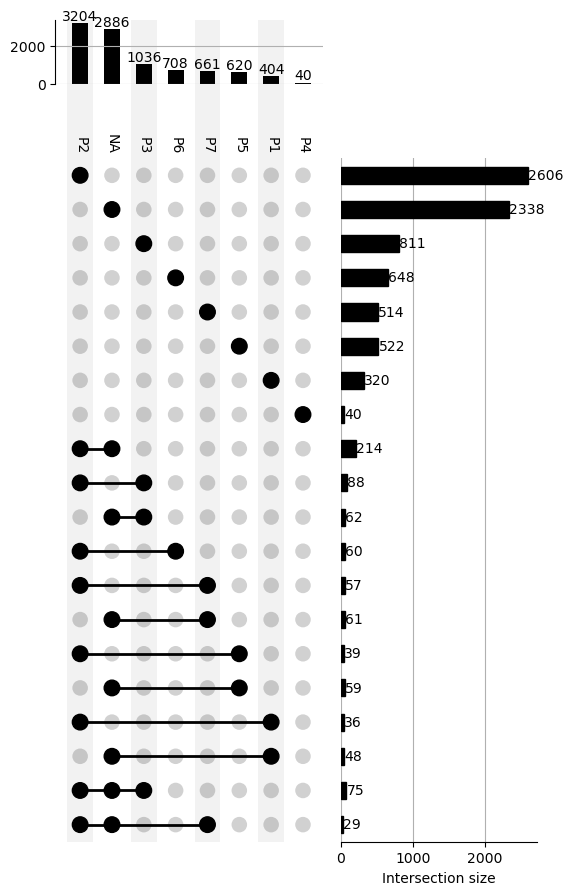

In [82]:
# Melt the dataframe
df_gcf_presence_tmp = df_gcf_presence_combined.copy()
df_gcf_presence_tmp["genome_id"] = df_gcf_presence_tmp.index
df1 = df_gcf_presence_tmp.melt(id_vars=["genome_id"], value_vars=df_gcf_presence_tmp.columns[:-1],
                               var_name="BGC",
                               value_name="presence")
df2 = df_clusters[["Cluster_label"]]
df2.Cluster_label.fillna("NA",inplace=True)
# Merging dataframes
df = df1.merge(df2, on='genome_id')

# Creating a pivot table
pivot_table = df.pivot_table(index='BGC', columns='Cluster_label', values='presence', aggfunc='sum').fillna(0)

df_binary = (pivot_table > 0).astype(int)

# Convert the wide DataFrame to a long one
df_long = df_binary.reset_index().melt(id_vars='BGC', value_name='presence')
# Filter out entries where presence is 0
df_long = df_long[df_long.presence == 1]

# Create a boolean matrix representation
df_bool = pd.crosstab(df_long['BGC'], df_long['Cluster_label'])

# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_bool.astype(bool)))


# Calculate the size of each intersection
intersection_counts = df_multi_index.groupby(level=list(range(df_multi_index.index.nlevels))).size()

# Sort by size and keep the top n intersections
n = 20
top_intersections = intersection_counts.nlargest(n).index

# Filter df_multi_index to only include top intersections
df_multi_index_filtered = df_multi_index[df_multi_index.index.isin(top_intersections)]

# This will sort by size of intersections and only show the top 10
ax = plot(df_multi_index_filtered, subset_size='count', show_counts=True, orientation="vertical")
# plt.savefig("assets/figures/upset_gcfs_2_6.svg")
plt.savefig("assets/figures/Figure_3/upset_gcfs_top_20.png")
plt.show()

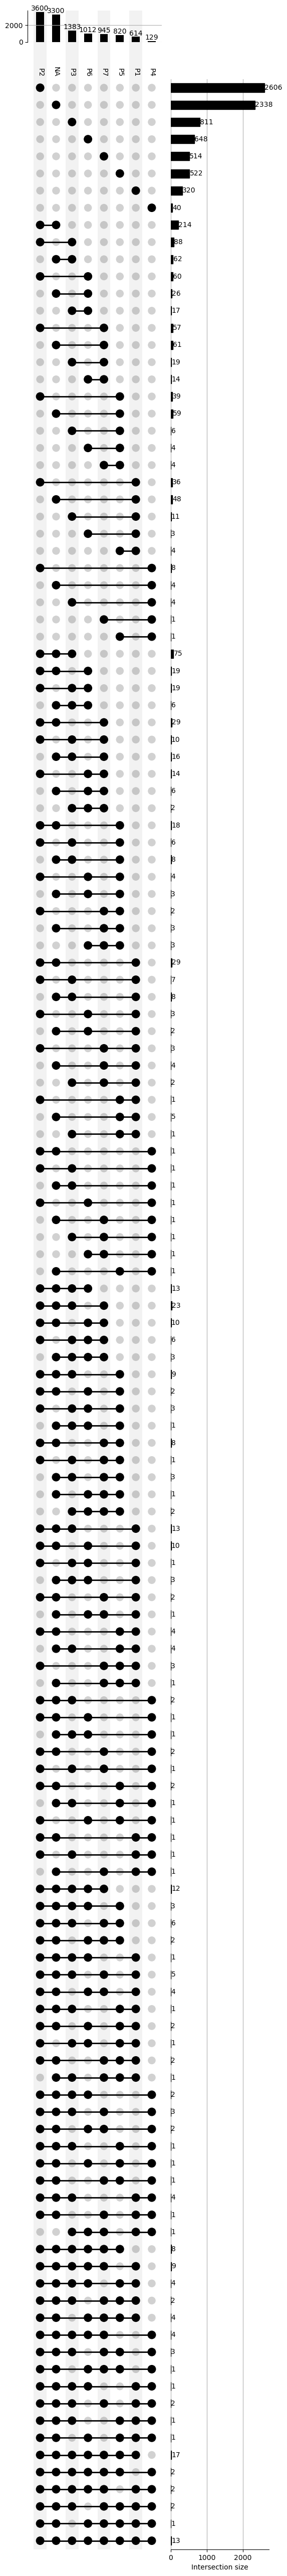

In [93]:
# This will sort by size of intersections and only show the top 10
ax = plot(df_multi_index, subset_size='count', show_counts=True, orientation="vertical")
# plt.savefig("assets/figures/upset_gcfs_2_6.svg")
# plt.savefig("assets/figures/Figure_3/upset_gcfs_top_all.pdf")
plt.show()

# BGC type based variation across known clusters

In [119]:
df_gcfs_bigslice_combined_known = df_gcfs_bigslice_combined[df_gcfs_bigslice_combined.known == "Known"]
df_gcfs_bigslice_combined_known_abundant = df_gcfs_bigslice_combined_known[df_gcfs_bigslice_combined_known.top_known_cluster_category.isin(['Polyketide', 
                                                                            'NRP', 'RiPP', 'Other', 'NRP+Polyketide', 'Terpene', 'Saccharide', 'Alkaloid'])]
df_gcfs_selected= df_gcfs_bigslice_combined_known_abundant.sort_values(by=["top_known_cluster_category","top_known_cluster_type", "bgc_count"], ascending=False)

<Figure size 640x480 with 0 Axes>

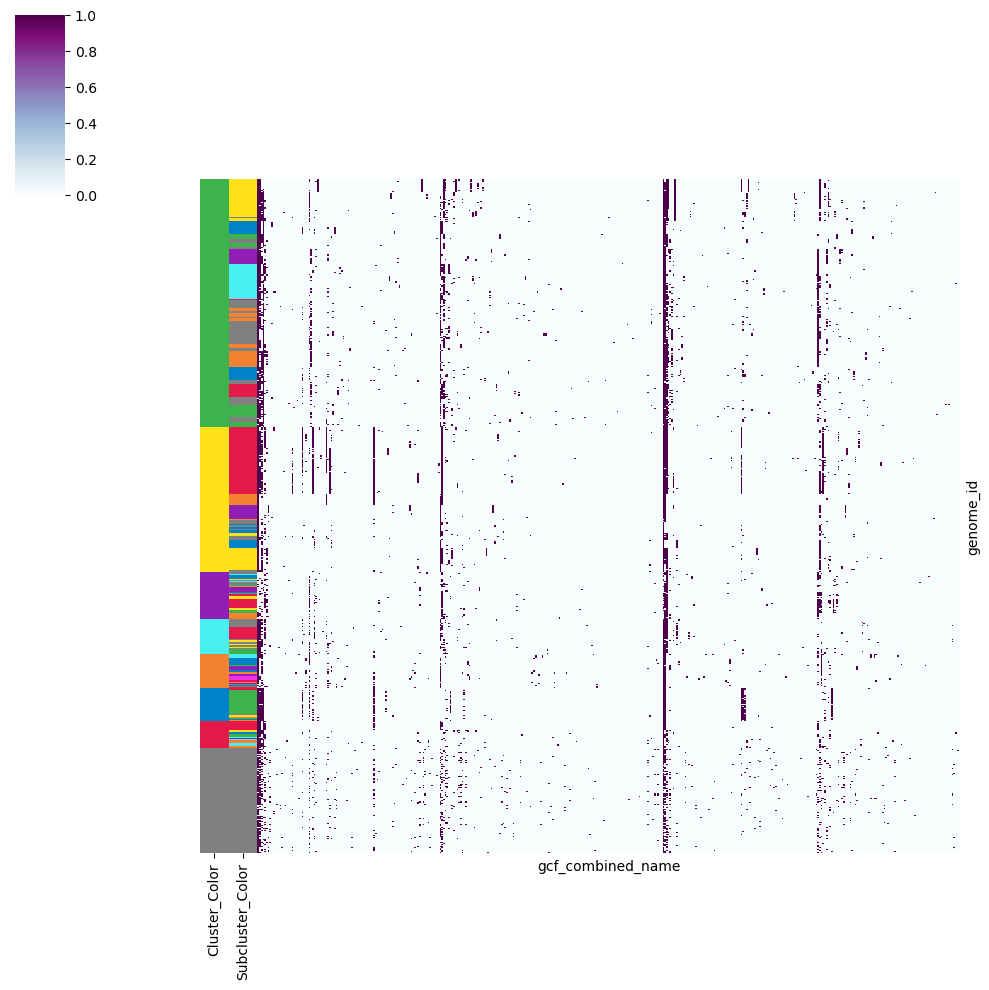

In [120]:
df_colors = df_clusters.loc[df_clusters.index,["Cluster_Color", "Subcluster_Color"]]
df_heatmap = df_gcf_presence_combined_all.loc[df_clusters.index, df_gcfs_selected.index]
df_heatmap = (df_heatmap > 0).astype(int) 
df_heatmap.columns = df_gcfs_selected.gcf_combined_name
plt.figure()
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=False, yticklabels=False)
plt.savefig("assets/figures/Figure_3/known_gcfs_category.png")
# plt.savefig("assets/figures/Figure_3/known_gcfs_category.pdf")

In [132]:
df_gcfs_bigslice_combined_known[df_gcfs_bigslice_combined_known.gcf_combined_id.isin(["BGC0000353", "BGC0000994", "BGC0001040"])]
d

bigslice_gcf_count bgc_count  known known_cluster_count  \
BGC0001040                  1       4.0  Known                   1   
BGC0000994                  2       3.0  Known                   1   

           known_clusters_id top_known_cluster_id top_known_cluster_name  \
BGC0001040        BGC0001040           BGC0001040              rapamycin   
BGC0000994        BGC0000994           BGC0000994              FR-900520   

           gcf_combined_name gcf_combined_id top_known_cluster_category  \
BGC0001040         rapamycin      BGC0001040             NRP+Polyketide   
BGC0000994         FR-900520      BGC0000994             NRP+Polyketide   

           top_known_cluster_type  
BGC0001040         NRP+Polyketide  
BGC0000994         NRP+Polyketide

In [139]:
df_bgcs_antismash[df_bgcs_antismash.most_similar_known_cluster_id.isin(["BGC0000353", "BGC0000994", "BGC0001040"])].sort_values(by="similarity")

genome_id  region             accession  \
bgc_id                                                                          
NZ_CM001019.1.region017         GCF_000148465.1    5.17         NZ_CM001019.1   
NZ_CM000914.1.region017         GCF_000163875.1    2.17         NZ_CM000914.1   
NZ_CP042266.1.region018         GCF_007856155.1    1.18         NZ_CP042266.1   
NZ_CP040916.1.region004         GCF_007363395.1    1.40         NZ_CP040916.1   
NZ_CP027859.1.region017         GCF_005519465.1    2.17         NZ_CP027859.1   
NZ_CP086233.1.region017         GCF_028752555.1    5.17         NZ_CP086233.1   
NZ_CP045850.1.region002         GCF_015708605.1    4.20         NZ_CP045850.1   
NZ_JADANO010000003.1.region002  GCF_019831915.1    2.20  NZ_JADANO010000003.1   
NZ_VFMT01000007.1.region001     GCF_006715185.1    7.10     NZ_VFMT01000007.1   
NZ_NOKT01000011.1.region002     GCF_002237655.1    2.20     NZ_NOKT01000011.1   
CP108235.region002                    NBC_00080    1.20              CP108235   
CP108867.region021                    NBC_00829    1.21              CP108867   
NZ_JAGGLR010000056.1.region001  GCF_017874715.1   56.10  NZ_JAGGLR010000056.1   
CP108989.region019                    NBC_00722    1.19              CP108989   
NZ_BDFA01000021.1.region001     GCF_001748165.1   15.10     NZ_BDFA01000021.1   
CP108006.region025                    NBC_00335    1.25              CP108006   
NZ_JAIFZO010000002.1.region001  GCF_026341275.1    2.10  NZ_JAIFZO010000002.1   
NZ_JAPELZ010000002.1.region001  GCF_026343255.1    2.10  NZ_JAPELZ010000002.1   
NZ_JARXYQ010000002.1.region001  GCF_029894045.1    2.10  NZ_JARXYQ010000002.1   
CP109171.region020                    NBC_01723    1.20              CP109171   
NZ_CP022545.1.region017         GCF_003595545.1    1.17         NZ_CP022545.1   
NZ_JARXYP010000002.1.region027  GCF_029893805.1    2.27  NZ_JARXYP010000002.1   
NZ_JARXYL010000001.1.region001  GCF_029894375.1    1.10  NZ_JARXYL010000001.1   
NZ_JAGGLR010000037.1.region001  GCF_017874715.1   37.10  NZ_JAGGLR010000037.1   
NZ_JARXYO010000001.1.region001  GCF_029893925.1    1.10  NZ_JARXYO010000001.1   
NZ_JAPEOK010000003.1.region002  GCF_026341515.1    2.20  NZ_JAPEOK010000003.1   
NZ_CP023992.1.region045         GCF_002591335.1    1.45         NZ_CP023992.1   
NZ_CP025018.1.region002         GCF_002812405.1    1.20         NZ_CP025018.1   
NZ_CP029823.1.region002         GCF_006974005.1    1.20         NZ_CP029823.1   
NZ_JAGGLR010000047.1.region001  GCF_017874715.1   47.10  NZ_JAGGLR010000047.1   
NZ_JACHNG010000002.1.region018  GCF_014205315.1    2.18  NZ_JACHNG010000002.1   
NZ_CP020700.1.region005         GCF_003932715.1    1.50         NZ_CP020700.1   
NZ_CP042266.1.region027         GCF_007856155.1    1.27         NZ_CP042266.1   
NZ_CP029159.1.region029         GCF_000297155.3    1.29         NZ_CP029159.1   
NZ_SGFG01000008.1.region001     GCF_004295505.1   27.10     NZ_SGFG01000008.1   
NZ_CP070379.1.region032         GCF_016919685.1    1.32         NZ_CP070379.1   
NZ_CP045178.1.region030         GCF_009296025.1    1.30         NZ_CP045178.1   
NZ_JACHNG010000004.1.region001  GCF_014205315.1    4.10  NZ_JACHNG010000004.1   
NZ_CP023699.1.region003         GCF_008704495.1    1.30         NZ_CP023699.1   
NZ_CP114036.1.region039         GCF_026898115.1    1.39         NZ_CP114036.1   
NC_022785.1.region039           GCF_000418455.1    1.39           NC_022785.1   
NZ_CP085193.1.region036         GCF_024298965.1    1.36         NZ_CP085193.1   
NZ_QYCY01000001.1.region004     GCF_003675955.1    1.40     NZ_QYCY01000001.1   

                                start_pos   end_pos  contig_edge  \
bgc_id                                                             
NZ_CM001019.1.region017           1595994   1657757        False   
NZ_CM000914.1.region017           1598583   1660443        False   
NZ_CP042266.1.region018           5492890   5532557        False   
NZ_CP040916.1.region004            440097    465586 

In [130]:
df_gcfs_selected_pks = df_gcfs_selected[df_gcfs_selected.top_known_cluster_category == "Polyketide"]
df_gcfs_selected_pks = df_gcfs_selected_pks.sort_values(by="bigslice_gcf_count", ascending=False)
df_gcfs_selected_pks

bigslice_gcf_count bgc_count  known known_cluster_count  \
BGC0000271                153    1214.0  Known                   7   
BGC0000282                151     932.0  Known                   3   
BGC0001310                 56     589.0  Known                   1   
BGC0002127                 40     560.0  Known                   1   
BGC0002517                 13      75.0  Known                   3   
...                       ...       ...    ...                 ...   
BGC0000273                  1       1.0  Known                   1   
BGC0000233                  1      18.0  Known                   1   
BGC0000245                  1      19.0  Known                   1   
BGC0002012                  1      20.0  Known                   2   
BGC0001666                  1       1.0  Known                   1   

                                            known_clusters_id  \
BGC0000271  BGC0001625,BGC0002369,BGC0000225,BGC0000266,BG...   
BGC0000282                   BGC0001229,BGC0000339,BGC0000282   
BGC0001310                                         BGC0001310   
BGC0002127                                         BGC0002127   
BGC0002517                   BGC0000282,BGC0001770,BGC0002517   
...                                                       ...   
BGC0000273                                         BGC0000273   
BGC0000233                                         BGC0000233   
BGC0000245                                         BGC0000245   
BGC0002012                              BGC0002016,BGC0002012   
BGC0001666                                         BGC0001666   

           top_known_cluster_id                     top_known_cluster_name  \
BGC0000271           BGC0000271                              spore pigment   
BGC0000282           BGC0000282                            alkylresorcinol   
BGC0001310           BGC0001310                                 naringenin   
BGC0002127           BGC0002127  flaviolin/1,3,6,8-tetrahydroxynaphthalene   
BGC0002517           BGC0002517               tripartilactam/niizalactam C   
...                         ...                                        ...   
BGC0000273           BGC0000273                              steffimycin D   
BGC0000233           BGC0000233                                  hedamycin   
BGC0000245           BGC0000245                                 medermycin   
BGC0002012           BGC0002012            julichrome Q3-3/julichrome Q3-5   
BGC0001666           BGC0001666                             microansamycin   

                          gcf_combined_name gcf_combined_id  \
BGC0000271                    spore pigment      BGC0000271   
BGC0000282                  alkylresorcinol      BGC0000282   
BGC0001310                       naringenin      BGC0001310   
BGC0002127          tetrahydroxynaphthalene      BGC0002127   
BGC0002517                   tripartilactam      BGC0002517   
...                                     ...             ...   
BGC0000273                    steffimycin D      BGC0000273   
BGC0000233                        hedamycin      BGC0000233   
BGC0000245                       medermycin      BGC0000245   
BGC0002012  julichrome Q3-3/julichrome Q3-5      BGC0002012   
BGC0001666                   microansamycin      BGC0001666   

           top_known_cluster_category  \
BGC0000271                 Polyketide   
BGC0000282                 Polyketide   
BGC0001310                 Polyketide   
BGC0002127                 Polyketide   
BGC0002517                 Polyketide   
...                               ...   
BGC0000273                 Polyketide   
BGC0000233                 Polyketide   
BGC0000245                 Polyketide   
BGC0002012                 Polyketide   
BGC0001666                 Polyketide   

                                       top_known_cluster_type  
BGC0000271                                         Polyketide  
BGC0000282                                         Polyketide  
BGC0001310

In [125]:
df_gcfs_selected.top_known_cluster_category.value_counts()

top_known_cluster_category
Polyketide        161
NRP                94
RiPP               48
Other              45
NRP+Polyketide     40
Terpene            13
Saccharide          7
Alkaloid            5
Name: count, dtype: int64

In [126]:
df_gcfs_selected.top_known_cluster_type.value_counts()

top_known_cluster_type
Polyketide                                                                                                     122
NRP                                                                                                             79
Other                                                                                                           36
NRP+Polyketide                                                                                                  30
RiPP                                                                                                            28
Polyketide:Type II polyketide                                                                                   14
Terpene                                                                                                         13
Polyketide:Modular type I polyketide                                                                            11
RiPP:Lanthipeptide                                       

In [123]:
df_gcfs_selected.top_known_cluster_category.unique()

array(['Terpene', 'Saccharide', 'RiPP', 'Polyketide', 'Other',
       'NRP+Polyketide', 'NRP', 'Alkaloid'], dtype=object)

In [ ]:
# All GCFs
df_filtered = df_binary.copy()

# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_filtered.astype(bool)))

# Calculate the size of each intersection
intersection_counts = df_multi_index.groupby(level=list(range(df_multi_index.index.nlevels))).size()

# Sort by size and keep the top n intersections
n = 20
top_intersections = intersection_counts.nlargest(n).index

# Filter df_multi_index to only include top intersections
df_multi_index_filtered = df_multi_index[df_multi_index.index.isin(top_intersections)]

# This will sort by size of intersections and only show the top 10
ax = plot(df_multi_index_filtered, subset_size='count', show_counts=True, orientation="vertical")
# plt.savefig("assets/figures/upset_gcfs_2_6.svg")
# plt.savefig("assets/figures/upset_gcfs_2_6.png")
plt.show()

<Figure size 2000x4000 with 0 Axes>

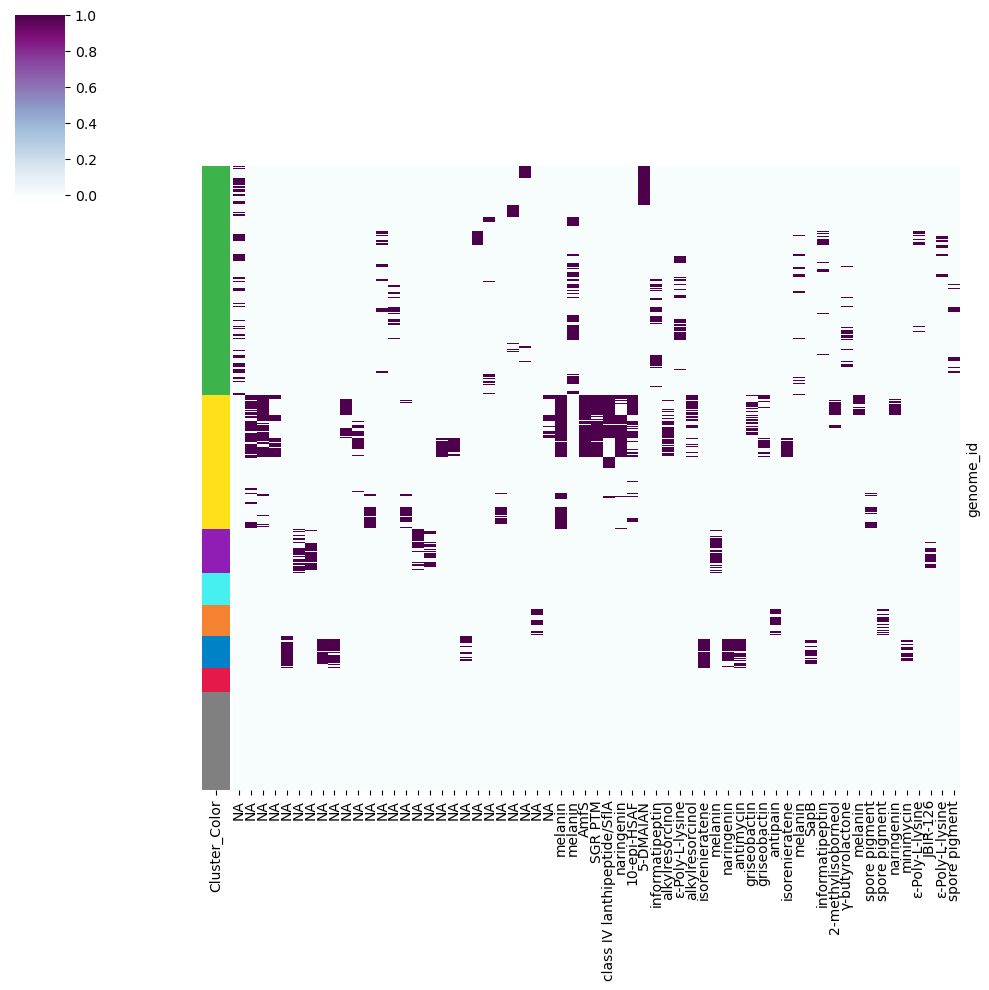

In [505]:
# Reduce GCFs to those with more than 50 BGCs
df_gcf_unique_red = df_gcf_unique[df_gcf_unique["count"] > 50]
df_heatmap = df_gcf_presence.loc[df_clusters.index, df_gcf_unique_red.index]
df_heatmap.columns = [mibig if mibig not in replace_knonw_dict.keys() else replace_knonw_dict[mibig] for mibig in df_gcf_unique_red.top_known_cluster_name]
plt.figure(figsize=(20,40))
sns.clustermap(df_heatmap, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=True, yticklabels=False)
plt.savefig("assets/figures/Figure_3/bigslice_present_unique_reduced.png")

In [569]:
df_gcf_presence_combined = df_gcf_presence.copy()

In [562]:
df_bgcs_bigslice.gcf_combined.value_counts()

gcf_combined
ectoine            2309
hopene             2148
desferrioxamine    1991
melanin            1563
geosmin            1528
                   ... 
8239                  1
728                   1
4694                  1
3588                  1
10341                 1
Name: count, Length: 9240, dtype: int64

<Figure size 1500x1000 with 0 Axes>

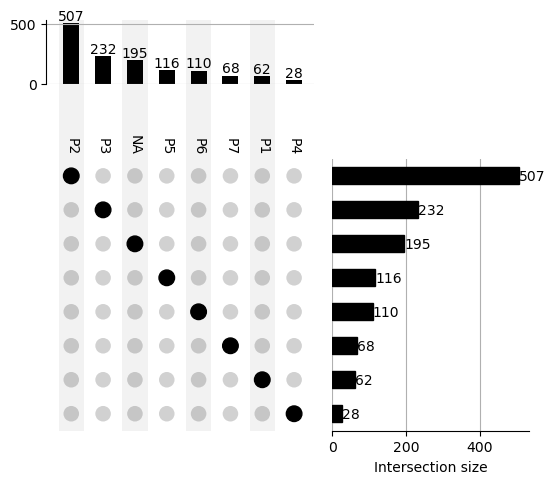

In [326]:
# Filter rows for BGCs present in only 1 group
df_filtered = df_binary[df_binary.sum(axis=1) == 1]


# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_filtered.astype(bool)))

# Manually set the colors
plt.figure(figsize=(15, 10))

ax = plot(df_multi_index, subset_size='count', show_counts=True, orientation="vertical")
plt.savefig("assets/figures/upset_gcfs_1.svg")
plt.savefig("assets/figures/upset_gcfs_1.png")
plt.show()

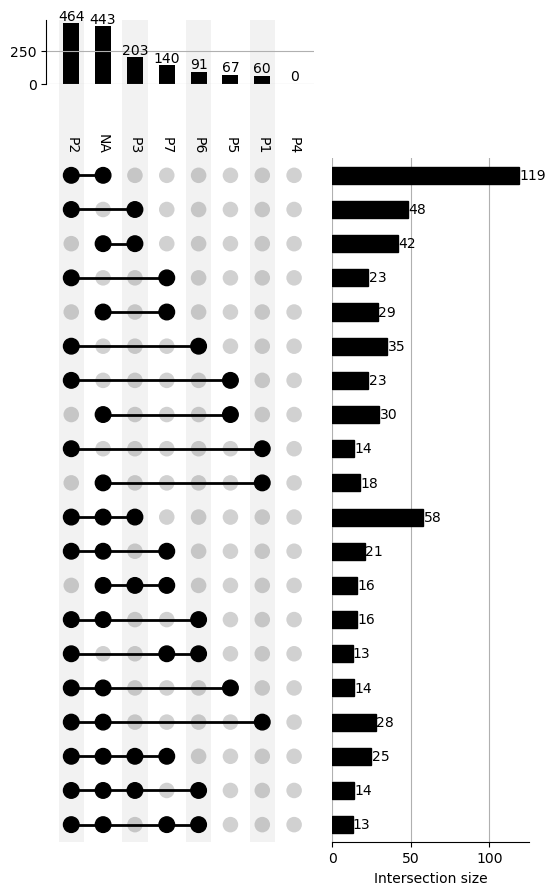

In [332]:
# Filter BGCs present in 2 to 6 groups and keep top n intersections 
df_filtered = df_binary[(df_binary.sum(axis=1) > 1) & (df_binary.sum(axis=1) < 6)]

# Convert this DataFrame to a MultiIndex of boolean values
df_multi_index = pd.DataFrame(index=pd.MultiIndex.from_frame(df_filtered.astype(bool)))

# Calculate the size of each intersection
intersection_counts = df_multi_index.groupby(level=list(range(df_multi_index.index.nlevels))).size()

# Sort by size and keep the top n intersections
n = 20
top_intersections = intersection_counts.nlargest(n).index

# Filter df_multi_index to only include top intersections
df_multi_index_filtered = df_multi_index[df_multi_index.index.isin(top_intersections)]

# This will sort by size of intersections and only show the top 10
ax = plot(df_multi_index_filtered, subset_size='count', show_counts=True, orientation="vertical")
plt.savefig("assets/figures/upset_gcfs_2_6.svg")
plt.savefig("assets/figures/upset_gcfs_2_6.png")
plt.show()

In [378]:
df_multi_index_filtered

Empty DataFrame
Columns: []
Index: [(True, False, False, False, False, True, False, False), (True, False, True, False, False, False, False, False), (True, True, False, False, False, False, False, False), (False, False, True, False, False, False, True, False), (False, False, True, False, False, False, False, True), (True, False, False, True, False, False, False, True), (False, False, True, False, False, False, True, False), (True, True, True, False, False, False, False, False), (True, False, True, True, False, False, False, False), (False, False, True, False, False, False, True, False), (True, False, True, True, False, False, False, True), (True, False, True, False, False, False, False, False), (False, False, True, False, False, False, False, True), (False, False, True, False, False, False, True, False), (True, False, True, False, False, False, True, True), (False, False, True, False, False, False, True, True), (True, False, True, True, False, False, True, False), (True, False, False, True, False, False, False, False), (True, False, True, True, False, False, False, False), (True, False, True, False, False, False, False, False), (True, False, True, False, False, False, False, False), (False, False, True, True, False, False, False, False), (True, False, True, True, False, False, False, True), (True, False, True, False, False, False, False, False), (True, False, True, True, False, False, False, False), (True, False, True, False, False, False, False, False), (False, False, True, True, False, False, False, False), (True, False, True, True, False, False, False, True), (True, False, True, False, False, False, False, False), (True, False, False, False, False, True, False, False), (False, False, True, False, False, False, True, False), (True, False, True, False, False, False, False, False), (True, False, False, True, False, False, False, True), (True, False, True, True, False, False, False, True), (True, False, True, False, False, False, False, False), (True, False, False, True, False, False, False, False), (True, False, True, False, False, False, False, False), (False, False, True, True, False, False, False, False), (True, False, True, False, False, False, False, False), (True, False, True, False, False, False, False, False), (False, False, True, False, False, False, True, True), (True, False, True, True, False, False, False, False), (True, False, True, False, False, False, False, False), (True, False, True, True, False, False, False, False), (True, False, False, True, False, False, False, False), (True, False, False, False, False, False, False, True), (True, True, True, False, False, False, False, False), (True, False, True, True, False, False, False, False), (False, True, True, False, False, False, False, False), (True, False, True, True, False, False, False, False), (True, False, True, True, False, False, False, False), (True, False, True, False, False, False, False, True), (True, True, False, False, False, False, False, False), (True, False, True, True, False, False, False, False), (True, False, True, False, False, False, False, False), (True, False, True, False, False, False, False, False), (True, False, False, False, False, False, False, True), (False, False, True, False, False, False, False, True), (False, True, True, False, False, False, False, False), (True, True, True, False, False, False, False, False), (True, False, False, True, False, False, False, False), (True, False, False, True, False, False, False, True), (True, False, False, True, False, False, False, True), (True, False, False, True, False, False, False, False), (False, False, True, True, False, False, False, False), (True, False, True, False, False, False, False, False), (True, False, False, True, False, False, False, False), (False, False, True, True, False, False, False, False), (True, False, True, False, False, False, False, False), (True, False, True, False, False, False, True, False), (True, False, False, False, False, True, False, False), (True, False, True, 

In [ ]:
# Merging dataframes
df = df1.merge(df2, on='genome')

# Creating a pivot table
pivot_table = df.pivot_table(index='BGC', columns='phylogroup', values='presence', aggfunc='sum').fillna(0)


In [ ]:
# !pip install UpSetPlot

In [ ]:
# Melt the dataframe
df_gcf_presence_tmp = df_gcf_presence.copy()
df_gcf_presence_tmp["genome_id"] = df_gcf_presence_tmp.index
df1 = df_gcf_presence_tmp.melt(id_vars=["genome_id"], value_vars=df_gcf_presence.columns[:-1],
                               var_name="BGC",
                               value_name="presence")

In [ ]:
df2 = df_clusters[["Cluster_label"]]

In [ ]:
df1

In [ ]:
# Set a threshold for minimum presence across all genomes
threshold = 0.3

# Merge the DataFrames
merged_df = df_genomes.join(df_clusters)

# Define the minimum cluster size
min_cluster_size = 20

# Group by cluster and filter
filtered_clusters_df = merged_df.groupby('Subcluster').filter(lambda x: len(x) >= min_cluster_size)

min_count = 10
def signature_bgcs(cluster_group, overall_presence, threshold=0.3):
    cluster_size = len(cluster_group)
    bgc_counts = cluster_group.drop(columns=['Subcluster']).sum()
    # Consider BGCs that are present in more than the threshold proportion within the cluster
    # and are rare or absent in the others
    
    signature_bgcs = bgc_counts[(bgc_counts > min_count) & (bgc_counts == overall_presence)]
    return signature_bgcs.index.tolist()

# Calculate overall presence for each BGC across all genomes
overall_presence = filtered_clusters_df.drop(columns=['Subcluster']).sum(axis=0)

# Group by cluster and apply the signature_bgcs function
clusters = filtered_clusters_df.groupby('Subcluster')
signature_bgcs_per_cluster = clusters.apply(lambda x: signature_bgcs(x, overall_presence, threshold))

all_signature_bgcs = []
for phylogroup in filtered_clusters_df.Subcluster.unique():
    bgc_list = signature_bgcs_per_cluster[phylogroup]
    all_signature_bgcs = all_signature_bgcs + bgc_list
# all_signature_bgcs = list(set(all_signature_bgcs))

df_signature_gcfs = pd.DataFrame(index=all_signature_bgcs, columns=["phylogroup", "color", "genomes", "bgcs", "known_cluster_count", "top_known_cluster", "manual_label"])

replace_knonw_dict = {"surugamide A/surugamide D": "surugamide",
                      "leupeptin Pr/leupeptin Ac": "leupeptin",
                      "diisonitrile antibiotic SF2768": "SF2768",
                      "isatropolone A/isotropolone B/isotropolone C": "isatropolone",
                      "montamide A/capsimycin/clifednamide A/frontalamide A/combamide A": "montamide",
                      "legonoxamine A/desferrioxamine B/legonoxamine B": "legonoxamine",
                      "SGR PTMs/SGR PTM Compound b/SGR PTM Compound c/SGR PTM Compound d": "SGR PTM",
                      "5-dimethylallylindole-3-acetonitrile" : "5-DMAIAN",
                      "flaviolin/1,3,6,8-tetrahydroxynaphthalene": "tetrahydroxynaphthalene"}

for phylogroup in filtered_clusters_df.Subcluster.unique():
    bgc_list = signature_bgcs_per_cluster[phylogroup]
    for gcf in bgc_list:
        df_bigslice_selected = df_bgcs_bigslice[df_bgcs_bigslice.gcf_id == str(gcf)]
        df_signature_gcfs.loc[gcf, "phylogroup"] = phylogroup
        df_signature_gcfs.loc[gcf, "color"] = df_subcluster[df_subcluster.Cluster == int(phylogroup.split("_")[1])].Cluster_Color[0]
        
        df_signature_gcfs.loc[gcf, "genomes"] = len(df_bigslice_selected.genome_id.unique())
        df_signature_gcfs.loc[gcf, "bgcs"] = df_bigslice_selected.shape[0]
    
        df_antismash_selected = df_bgcs_antismash.loc[df_bigslice_selected.index, :]
        df_antismash_selected = df_antismash_selected[df_antismash_selected.similarity > 0.5]
        
        known_cluster_count =  df_antismash_selected.most_similar_known_cluster_description.value_counts()    
        df_signature_gcfs.loc[gcf, "known_cluster_count"] = len(known_cluster_count)
        if len(known_cluster_count) > 0:
            known_cluster_name = known_cluster_count.index[0]
            df_signature_gcfs.loc[gcf, "top_known_cluster"] = known_cluster_name
            if known_cluster_name in replace_knonw_dict.keys():
                df_signature_gcfs.loc[gcf, "manual_label"] = replace_knonw_dict[known_cluster_name]
            else:
                df_signature_gcfs.loc[gcf, "manual_label"] = known_cluster_name
        else:
            df_signature_gcfs.loc[gcf, "top_known_cluster"] = "Unknown"
            df_signature_gcfs.loc[gcf, "manual_label"] = ""
        
df_plot = df_gcf_presence.loc[filtered_clusters_df.index,all_signature_bgcs]
df_plot.columns = df_signature_gcfs.manual_label.tolist()

plt.figure(figsize=(10,12))
sns.set(font_scale=0.8)
sns.clustermap(df_plot, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, 
               row_cluster=False, col_cluster=False,
               xticklabels=False, yticklabels=False)
# plt.savefig("assets/figures/Figure_3/signature_bgcs.png")

## Explore 

In [ ]:
clusters = [1, 2, 3, 4, 5, 6, 7]

for cluster_selected in clusters:
    print("BGCs in cluster:", cluster_selected)
    df_mash_cluster_selected = df_mash_cluster[df_mash_cluster.Cluster==cluster_selected]
    
    df_gcf_presence_selected = df_gcf_presence.loc[df_mash_cluster_selected.index, :]
    df_gcf_presence_selected = df_gcf_presence_selected[df_gcf_presence_selected.columns[df_gcf_presence_selected.sum(0) > 5]]
    
    row_colors = df_mash_cluster['Cluster_Color']
    
    plt.figure()
    sns.clustermap(df_gcf_presence.loc[:, df_gcf_presence_selected.columns], 
                   metric="euclidean", method="ward", cmap="BuPu",
                   row_colors=df_colors, row_cluster=False,
                   xticklabels=False, yticklabels=False )
    plt.show()

    plt.figure()
    sns.clustermap(df_gcf_presence_selected, 
                   metric="euclidean", method="ward", cmap="BuPu",
                   row_colors=df_colors, row_cluster=False,
                   xticklabels=False, yticklabels=False, figsize=(25,15))
    plt.show()

In [347]:
df_binary

Cluster_label  NA  P1  P2  P3  P4  P5  P6  P7
BGC                                          
10              1   1   1   1   0   1   0   0
1000            0   0   1   0   0   0   0   0
10008           0   0   1   0   0   0   0   0
10009           0   0   1   0   0   0   0   0
1001            0   0   1   0   0   0   0   0
...            ..  ..  ..  ..  ..  ..  ..  ..
9975            1   1   1   0   0   0   0   0
9978            1   0   1   0   0   0   0   0
9982            0   0   0   0   0   0   1   0
9989            0   1   0   0   0   0   0   0
9992            1   1   1   0   0   0   0   0

[2268 rows x 8 columns]

In [349]:
df_gcf_presence

6340  597  157  6026  988  1871  2007  1979  105  798  ...  \
genome_id                                                               ...   
GCF_020092725.1     0    0    1     1    0     0     0     0    1    0  ...   
GCF_020092675.1     0    0    1     0    0     0     0     0    1    0  ...   
GCF_020092695.1     0    0    1     0    0     0     0     0    1    0  ...   
GCF_020092565.1     0    0    1     1    0     0     0     0    1    0  ...   
GCF_020092625.1     0    0    1     0    0     0     0     0    1    0  ...   
...               ...  ...  ...   ...  ...   ...   ...   ...  ...  ...  ...   
NBC_01786           1    0    1     0    0     0     0     1    0    0  ...   
NBC_01794           1    1    0     0    0     0     0     1    0    0  ...   
NBC_01795           0    0    0     1    0     0     0     0    0    0  ...   
NBC_01803           0    0    0     0    0     0     0     0    0    0  ...   
NBC_01808           0    0    0     0    1     0     0     0    0    0  ...   

                 6191  6190  6187  6186  6185  6183  6182  1354  6180  1220  
genome_id                                                                    
GCF_020092725.1     0     0     0     0     0     0     0     0     0     0  
GCF_020092675.1     0     0     0     0     0     0     0     0     0     0  
GCF_020092695.1     0     0     0     0     0     0     0     0     0     0  
GCF_020092565.1     0     0     0     0     0     0     0     0     0     0  
GCF_020092625.1     0     0     0     0     0     0     0     0     0     0  
...               ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
NBC_01786           0     0     0     0     0     0     0     0     0     0  
NBC_01794           0     0     0     0     0     0     0     0     0     0  
NBC_01795           0     0     0     0     0     0     0     0     0     0  
NBC_01803           0     0     0     0     0     0     0     0     0     0  
NBC_01808           0     0     0     0     0     0     0     0     0     0  

[2371 rows x 11528 columns]

In [373]:
df_binary = df_binary.reindex(df_binary.sum(1).index)

In [367]:
df_binary.sort_values(by=df_bool.columns.tolist(), ascending=False, inplace=True)

In [377]:
df_binary

BGC
1725    8
1917    8
597     8
6026    8
7414    8
       ..
8872    1
8899    1
945     1
9667    1
9818    1
Length: 2268, dtype: int64

<Figure size 640x480 with 0 Axes>

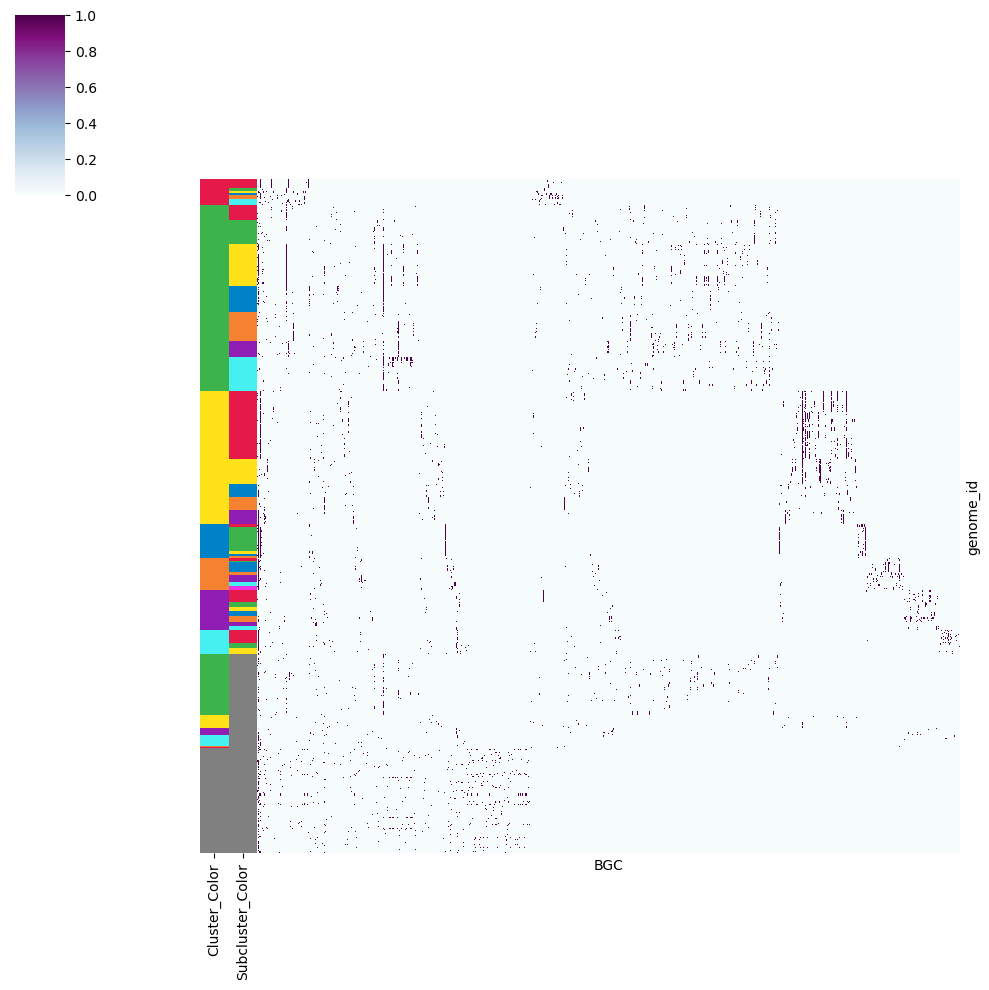

In [374]:
df_colors = df_clusters.loc[df_gcf_presence.index,["Cluster_Color", "Subcluster_Color"]]
plt.figure()
sns.clustermap(df_gcf_presence.loc[df_clusters.sort_values(by="Subcluster_label").index, df_binary.index], 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, row_cluster=False, col_cluster=False,
               xticklabels=False, yticklabels=False)
plt.savefig("assets/figures/Figure_3/bigslice_present_5.png")

In [ ]:
df_plot = df_gcf_presence.iloc[:,:2000]

plt.figure()
sns.clustermap(df_plot, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, 
               row_cluster=True, col_cluster=True,
               xticklabels=False, yticklabels=False)
plt.savefig("assets/figures/Figure_3/bigslice_BGC_2000.png")

## Phylogroup signature BGCs

In [ ]:
df_genomes = pd.DataFrame(columns=["Subcluster"])
df_genomes["Subcluster"] = df_mash_cluster.loc[df_subcluster.index,"Subcluster_label"]
df_genomes = df_genomes
df_clusters = df_gcf_presence.loc[df_genomes.index, :]
df_clusters = df_clusters.applymap(lambda x: 1 if x > 0 else 0)

# Set a threshold for minimum presence across all genomes
threshold = 0.3

# Merge the DataFrames
merged_df = df_genomes.join(df_clusters)

# Define the minimum cluster size
min_cluster_size = 20

# Group by cluster and filter
filtered_clusters_df = merged_df.groupby('Subcluster').filter(lambda x: len(x) >= min_cluster_size)

min_count = 10
def signature_bgcs(cluster_group, overall_presence, threshold=0.3):
    cluster_size = len(cluster_group)
    bgc_counts = cluster_group.drop(columns=['Subcluster']).sum()
    # Consider BGCs that are present in more than the threshold proportion within the cluster
    # and are rare or absent in the others
    
    signature_bgcs = bgc_counts[(bgc_counts > min_count) & (bgc_counts == overall_presence)]
    return signature_bgcs.index.tolist()

# Calculate overall presence for each BGC across all genomes
overall_presence = filtered_clusters_df.drop(columns=['Subcluster']).sum(axis=0)

# Group by cluster and apply the signature_bgcs function
clusters = filtered_clusters_df.groupby('Subcluster')
signature_bgcs_per_cluster = clusters.apply(lambda x: signature_bgcs(x, overall_presence, threshold))

all_signature_bgcs = []
for phylogroup in filtered_clusters_df.Subcluster.unique():
    bgc_list = signature_bgcs_per_cluster[phylogroup]
    all_signature_bgcs = all_signature_bgcs + bgc_list
# all_signature_bgcs = list(set(all_signature_bgcs))

df_signature_gcfs = pd.DataFrame(index=all_signature_bgcs, columns=["phylogroup", "color", "genomes", "bgcs", "known_cluster_count", "top_known_cluster", "manual_label"])

replace_knonw_dict = {"surugamide A/surugamide D": "surugamide",
                      "leupeptin Pr/leupeptin Ac": "leupeptin",
                      "diisonitrile antibiotic SF2768": "SF2768",
                      "isatropolone A/isotropolone B/isotropolone C": "isatropolone",
                      "montamide A/capsimycin/clifednamide A/frontalamide A/combamide A": "montamide",
                      "legonoxamine A/desferrioxamine B/legonoxamine B": "legonoxamine",
                      "SGR PTMs/SGR PTM Compound b/SGR PTM Compound c/SGR PTM Compound d": "SGR PTM",
                      "5-dimethylallylindole-3-acetonitrile" : "5-DMAIAN",
                      "flaviolin/1,3,6,8-tetrahydroxynaphthalene": "flaviolin"}

for phylogroup in filtered_clusters_df.Subcluster.unique():
    bgc_list = signature_bgcs_per_cluster[phylogroup]
    for gcf in bgc_list:
        df_bigslice_selected = df_bgcs_bigslice[df_bgcs_bigslice.gcf_id == str(gcf)]
        df_signature_gcfs.loc[gcf, "phylogroup"] = phylogroup
        df_signature_gcfs.loc[gcf, "color"] = df_subcluster[df_subcluster.Cluster == int(phylogroup.split("_")[1])].Cluster_Color[0]
        
        df_signature_gcfs.loc[gcf, "genomes"] = len(df_bigslice_selected.genome_id.unique())
        df_signature_gcfs.loc[gcf, "bgcs"] = df_bigslice_selected.shape[0]
    
        df_antismash_selected = df_bgcs_antismash.loc[df_bigslice_selected.index, :]
        df_antismash_selected = df_antismash_selected[df_antismash_selected.similarity > 0.5]
        
        known_cluster_count =  df_antismash_selected.most_similar_known_cluster_description.value_counts()    
        df_signature_gcfs.loc[gcf, "known_cluster_count"] = len(known_cluster_count)
        if len(known_cluster_count) > 0:
            known_cluster_name = known_cluster_count.index[0]
            df_signature_gcfs.loc[gcf, "top_known_cluster"] = known_cluster_name
            if known_cluster_name in replace_knonw_dict.keys():
                df_signature_gcfs.loc[gcf, "manual_label"] = replace_knonw_dict[known_cluster_name]
            else:
                df_signature_gcfs.loc[gcf, "manual_label"] = known_cluster_name
        else:
            df_signature_gcfs.loc[gcf, "top_known_cluster"] = "Unknown"
            df_signature_gcfs.loc[gcf, "manual_label"] = ""
        
df_plot = df_gcf_presence.loc[filtered_clusters_df.index,all_signature_bgcs]
df_plot.columns = df_signature_gcfs.manual_label.tolist()

plt.figure(figsize=(10,12))
sns.set(font_scale=0.8)
sns.clustermap(df_plot, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, 
               row_cluster=False, col_cluster=False,
               xticklabels=False, yticklabels=False)
# plt.savefig("assets/figures/Figure_3/signature_bgcs.png")

In [ ]:
df_signature_gcfs_known = df_signature_gcfs[df_signature_gcfs.known_cluster_count > 0].sort_values(by="bgcs", ascending=False)
df_plot = df_gcf_presence.loc[filtered_clusters_df.index,df_signature_gcfs_known.index]
df_plot.columns = df_signature_gcfs_known.manual_label.tolist()

plt.figure(figsize=(10,12))
sns.set(font_scale=0.8)
sns.clustermap(df_plot, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, 
               row_cluster=False, col_cluster=True,
               xticklabels=False, yticklabels=False)

In [ ]:
df_signature_gcfs.loc[signature_bgcs_per_cluster[0]]

In [ ]:
# Plot barplot across phylogroups
cluster_counts = df_signature_gcfs.groupby('phylogroup').size().reset_index(name='count')

# Create a dictionary mapping clusters to colors
color_mapping = dict(zip(df_signature_gcfs['phylogroup'], df_signature_gcfs['color']))

# Use the palette argument to set the colors
plot = sns.barplot(x='phylogroup', y='count', data=cluster_counts, palette=color_mapping)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.xlabel('Subphylogroup')
plt.ylabel('Number of singature BGCs')
plt.title('Total number of signature BGCs per subphylogroup')
plt.text(9, 80, f"Phylogroup selection:", ha='left')
plt.text(9, 75, f"More than 20 genomes", ha='left')
plt.text(9, 65, f"Signature BGCs selection:", ha='left')
plt.text(9, 60, f"Specifically present in more than", ha='left')
plt.text(9, 55, f"10 genomes of the phylogroup", ha='left')

plt.show()

In [ ]:
df_bgcs_bigslice

In [ ]:
for known_cluster in df_signature_gcfs.manual_label.value_counts().index[10:20]:
    df_signature_gcfs_known = df_signature_gcfs[df_signature_gcfs.manual_label == known_cluster]
    df_plot = df_gcf_presence.loc[filtered_clusters_df.index,df_signature_gcfs_known.index]
    df_plot.columns = df_signature_gcfs_known.manual_label.tolist()
    
    plt.figure(figsize=(4,4))
    sns.set(font_scale=1)
    cluster_grid = sns.clustermap(df_plot, 
                   metric="euclidean", method="ward", cmap="BuPu",
                   row_colors=df_colors, 
                   row_cluster=False, col_cluster=False,
                   xticklabels=False, yticklabels=False)
    cluster_grid.cax.set_visible(False)
    # Hide the tip text for row colors
    for tick_label in cluster_grid.ax_row_colors.get_xticklabels():
        tick_label.set_visible(False)

    cluster_grid.fig.suptitle(known_cluster, y=0.8)
    # plt.savefig("assets/figures/Figure_3/" + known_cluster + ".png", bbox_inches="tight")

In [ ]:
df_genomes = pd.DataFrame(columns=["Subcluster"])
df_genomes["Subcluster"] = df_mash_cluster.loc[df_subcluster.index,"Subcluster_label"]
df_genomes = df_genomes
df_clusters = df_gcf_presence.loc[df_genomes.index, :]
df_clusters = df_clusters.applymap(lambda x: 1 if x > 0 else 0)

# Set a threshold for minimum presence across all genomes
threshold = 0.5

# Merge the DataFrames
merged_df = df_genomes.join(df_clusters)

# Define the minimum cluster size
min_cluster_size = 20

# Group by cluster and filter
filtered_clusters_df = merged_df.groupby('Subcluster').filter(lambda x: len(x) >= min_cluster_size)

def signature_bgcs(cluster_group, overall_presence, threshold=0.3):
    cluster_size = len(cluster_group)
    bgc_counts = cluster_group.drop(columns=['Subcluster']).sum()
    # Consider BGCs that are present in more than the threshold proportion within the cluster
    # and are rare or absent in the others
    
    signature_bgcs = bgc_counts[(bgc_counts / cluster_size > threshold) & (bgc_counts == overall_presence)]
    return signature_bgcs.index.tolist()

# Calculate overall presence for each BGC across all genomes
overall_presence = filtered_clusters_df.drop(columns=['Subcluster']).sum(axis=0)

# Group by cluster and apply the signature_bgcs function
clusters = filtered_clusters_df.groupby('Subcluster')
signature_bgcs_per_cluster = clusters.apply(lambda x: signature_bgcs(x, overall_presence, threshold))

all_signature_bgcs = []
for phylogroup in filtered_clusters_df.Subcluster.unique():
    bgc_list = signature_bgcs_per_cluster[phylogroup]
    all_signature_bgcs = all_signature_bgcs + bgc_list
# all_signature_bgcs = list(set(all_signature_bgcs))

df_signature_gcfs = pd.DataFrame(index=all_signature_bgcs, columns=["phylogroup", "color", "genomes", "bgcs", "known_cluster_count", "top_known_cluster", "manual_label"])

replace_knonw_dict = {"surugamide A/surugamide D": "surugamide",
                      "leupeptin Pr/leupeptin Ac": "leupeptin",
                      "diisonitrile antibiotic SF2768": "SF2768",
                      "isatropolone A/isotropolone B/isotropolone C": "isatropolone",
                      "montamide A/capsimycin/clifednamide A/frontalamide A/combamide A": "montamide",
                      "legonoxamine A/desferrioxamine B/legonoxamine B": "legonoxamine",
                      "SGR PTMs/SGR PTM Compound b/SGR PTM Compound c/SGR PTM Compound d": "SGR PTM",
                      "5-dimethylallylindole-3-acetonitrile" : "5-DMAIAN",
                      "flaviolin/1,3,6,8-tetrahydroxynaphthalene": "tetrahydroxynaphthalene"}

for phylogroup in filtered_clusters_df.Subcluster.unique():
    bgc_list = signature_bgcs_per_cluster[phylogroup]
    for gcf in bgc_list:
        df_bigslice_selected = df_bgcs_bigslice[df_bgcs_bigslice.gcf_id == str(gcf)]
        df_signature_gcfs.loc[gcf, "phylogroup"] = phylogroup
        df_signature_gcfs.loc[gcf, "color"] = df_subcluster[df_subcluster.Cluster == int(phylogroup.split("_")[1])].Cluster_Color[0]
        
        df_signature_gcfs.loc[gcf, "genomes"] = len(df_bigslice_selected.genome_id.unique())
        df_signature_gcfs.loc[gcf, "bgcs"] = df_bigslice_selected.shape[0]
    
        df_antismash_selected = df_bgcs_antismash.loc[df_bigslice_selected.index, :]
        df_antismash_selected = df_antismash_selected[df_antismash_selected.similarity > 0.5]
        
        known_cluster_count =  df_antismash_selected.most_similar_known_cluster_description.value_counts()    
        df_signature_gcfs.loc[gcf, "known_cluster_count"] = len(known_cluster_count)
        if len(known_cluster_count) > 0:
            known_cluster_name = known_cluster_count.index[0]
            df_signature_gcfs.loc[gcf, "top_known_cluster"] = known_cluster_name
            if known_cluster_name in replace_knonw_dict.keys():
                df_signature_gcfs.loc[gcf, "manual_label"] = replace_knonw_dict[known_cluster_name]
            else:
                df_signature_gcfs.loc[gcf, "manual_label"] = known_cluster_name
        else:
            df_signature_gcfs.loc[gcf, "top_known_cluster"] = "Unknown"
            df_signature_gcfs.loc[gcf, "manual_label"] = ""
        
df_plot = df_gcf_presence.loc[filtered_clusters_df.index,all_signature_bgcs]
df_plot.columns = df_signature_gcfs.manual_label.tolist()

plt.figure(figsize=(10,12))
sns.set(font_scale=0.8)
cluster_grid = sns.clustermap(df_plot, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, 
               row_cluster=False, col_cluster=False,
               xticklabels=True, yticklabels=False)
cluster_grid.cax.set_visible(False)
    
# Hide the tip text for row colors
for tick_label in cluster_grid.ax_row_colors.get_xticklabels():
        tick_label.set_visible(False)
        
plt.savefig("assets/figures/Figure_3/signature_bgcs_percent.svg", bbox_inches="tight")

In [ ]:
df_signature_gcfs[40:]

In [ ]:
# Plot barplot across phylogroups
cluster_counts = df_signature_gcfs.groupby('phylogroup').size().reset_index(name='count')

# Create a dictionary mapping clusters to colors
color_mapping = dict(zip(df_signature_gcfs['phylogroup'], df_signature_gcfs['color']))

# Use the palette argument to set the colors
plot = sns.barplot(x='phylogroup', y='count', data=cluster_counts, palette=color_mapping)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.xlabel('Subphylogroup')
plt.ylabel('Number of singature BGCs')
plt.title('Total number of signature BGCs per subphylogroup')
plt.text(1, 9, f"Phylogroup selection:", ha='left')
plt.text(1, 8.5, f"More than 20 genomes", ha='left')
plt.text(1, 7, f"Signature BGCs selection:", ha='left')
plt.text(1, 6.5, f"Specifically present in more than", ha='left')
plt.text(1, 6, f"50% of genomes of the phylogroup", ha='left')

plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests

df_genomes = pd.DataFrame(columns=["Subcluster"])
df_genomes["Subcluster"] = df_mash_cluster.loc[df_subcluster.index,"Subcluster_label"]
df_clusters = df_gcf_presence.loc[df_genomes.index, :]
df_clusters = df_clusters.applymap(lambda x: 1 if x > 0 else 0)

# Set a threshold for minimum presence across all genomes
threshold = 10

df_clusters = df_clusters.loc[:, (df_clusters.sum(axis=0) >= threshold)]
# merge your dataframe (as before)
merged_df = df_genomes.join(df_clusters)

# transpose your dataframe so BGCs are rows and genomes are columns
df_t = df_clusters.transpose()

# now we can apply a chi-square test to each BGC
p_values = []
for bgc in df_t.index:
    # create contingency table
    contingency_table = pd.crosstab(df_t.loc[bgc], merged_df['Subcluster'])
    # perform chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    p_values.append(p)

# adjust p-values for multiple testing
rejects, pvals_corrected = multipletests(p_values, method='fdr_bh')[:2]

# create a DataFrame with the BGCs, p-values and corrected p-values
bgcs = df_t.index
results = pd.DataFrame({'BGC': bgcs, 'p_value': p_values, 'p_value_corrected': pvals_corrected})

# Filter results based on corrected p-values
significant_results = results[results['p_value_corrected'] > 0.05]

# print(significant_results)

In [ ]:
df_plot = df_gcf_presence.loc[df_subcluster.index,significant_results.BGC]

plt.figure()
sns.clustermap(df_plot, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=df_colors, 
               row_cluster=False, col_cluster=True,
               xticklabels=False, yticklabels=False)
# plt.savefig("assets/figures/Figure_3/bigslice_BGC_2000.png")

# Phylogroup 3 BGCs

In [ ]:
phylogroup = 3
df_phylogroup = df_mash_cluster[df_mash_cluster.Cluster == phylogroup]
df_gcf_presence_phylogroup = df_gcf_presence.loc[df_phylogroup.index, :]
df_gcf_presence_phylogroup = df_gcf_presence_phylogroup.loc[:, df_gcf_presence_phylogroup.sum() > 0]
df_phylo_subcluster = df_subcluster.loc[[genome_id for genome_id in df_phylogroup.index if genome_id in df_subcluster.index], :]
df_gcf_presence_phylogroup_top = df_gcf_presence_phylogroup.loc[df_phylo_subcluster.index, df_gcf_presence_phylogroup.sum() > 5]

In [ ]:
df_gcf_presence_phylogroup_top

In [ ]:
df_plot = df_gcf_presence_phylogroup_top.copy()
row_colors_subclusters = df_phylogroup["Subcluster_Color"]
plt.figure()
g = sns.clustermap(df_plot, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=row_colors_subclusters, 
               row_cluster=True, col_cluster=True,
               xticklabels=False, yticklabels=False)

In [ ]:
gcf_phylo = [str(gcf) for gcf in df_gcf_presence_phylogroup_top.columns.tolist()]
df_bgcs_bigslice_P3 = df_bgcs_bigslice[df_bgcs_bigslice.genome_id.isin(df_phylo_subcluster.index)]

df_bgcs_antismash_P3 = df_bgcs_antismash.loc[df_bgcs_bigslice_P3.index, :]
df_bgcs_antismash_P3 = pd.concat([df_bgcs_antismash_P3, df_bgcs_bigslice_P3], axis=1)

df_bgcs_antismash_P3.most_similar_known_cluster_description.value_counts()[:10]

In [ ]:
df_bgcs_antismash_P3.groupby(by=["gcf_id", "most_similar_known_cluster_description"]).count().sort_values(by="region", ascending=False)[:50]

In [ ]:
gcf_id = "6340"

In [ ]:
df_plot = df_gcf_presence.loc[:, df_gcf_presence_phylogroup_top.columns]
row_colors_subclusters = pd.DataFrame()
row_colors_subclusters["Cluster"] = df_mash_cluster["Cluster_Color"]
row_colors_subclusters.loc[df_phylo_subcluster.index,"Subcluster"] = df_phylo_subcluster.Cluster_Color
plt.figure()
g = sns.clustermap(df_plot, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=row_colors_subclusters, 
               row_cluster=False, col_cluster=True,
               xticklabels=False, yticklabels=False)

# Phylogroup abundance of GCFs

In [ ]:
subcluster_labels = ["P" + str(df_mash_cluster.loc[genome_id, "Cluster"]) + "_" + str(int(df_subcluster.loc[genome_id, "Cluster"])) for genome_id in df_subcluster.index]
df_mash_cluster.loc[df_subcluster.index, "Subcluster_label"] = subcluster_labels
df_mash_cluster.loc[df_subcluster.index, "Subcluster_Color"] = df_subcluster.Cluster_Color
df_subcluster_selected = df_mash_cluster.loc[df_subcluster.index, :]
df_gcf_presence_selected = df_gcf_presence.loc[df_subcluster_selected.index, :]

In [ ]:
df = df_gcf_presence_selected.join(df_subcluster_selected["Subcluster_label"])

In [ ]:
df_abundance = df.groupby('Subcluster_label').sum()

In [ ]:
# Calculate the total number of genomes in each cluster
total_genomes_per_cluster = df.groupby('Subcluster_label').size()

# Divide each family's abundance by the total number of genomes in each cluster
df_normalized = df_abundance.div(total_genomes_per_cluster, axis=0)
df_normalized = df_normalized.loc[:, df_normalized.sum() > 0]
df_normalized_1 = df_normalized.copy()

In [ ]:
# Transpose the dataframe to make families as rows
df_normalized = df_normalized.transpose()

# Calculate the total count for each family across all clusters
total_counts_per_family = df_normalized.sum(axis=1)

# Divide each family's count by the total count of the family across all clusters
df_normalized = df_normalized.div(total_counts_per_family, axis=0)

# Transpose back to make families as columns
df_normalized = df_normalized.transpose()
df_normalized_2 = df_normalized.copy()

In [ ]:
# import scipy.stats as stats

# significant_families = {}
# alpha = 0.05  # significance level

# # df_abundance is from the previous step
# for family in df_normalized.iloc[:,:30].columns:
#     # Create a contingency table for the family and the clusters
#     contingency_table = pd.crosstab(df['Cluster'], df[family])
    
#     # Perform Chi-Square test
#     chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    
#     # If p-value is less than alpha, the association is statistically significant
#     if p < alpha:
#         significant_families[family] = p

# print(significant_families)

In [ ]:
sns.clustermap(df_normalized_1, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_cluster=False, col_cluster=True,
               xticklabels=False, yticklabels=True )

In [ ]:
g = sns.clustermap(df_normalized_2, 
               metric="euclidean", method="ward", cmap="BuPu",
               row_cluster=False, col_cluster=True,
               xticklabels=False, yticklabels=True )

In [ ]:
sns.clustermap(df_gcf_presence.loc[:,g.data2d.columns], 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=row_colors, 
               row_cluster=False, col_cluster=False,
               xticklabels=False, yticklabels=False )

In [ ]:
sns.clustermap(df_gcf_presence.loc[:,df_normalized_2.columns.tolist()[:500]], 
               metric="euclidean", method="ward", cmap="BuPu",
               row_colors=row_colors, 
               row_cluster=True, col_cluster=True,
               xticklabels=False, yticklabels=False )

# Network of GCF similarity

In [ ]:
import pandas as pd
import networkx as nx
from itertools import combinations
from collections import Counter
from community import community_louvain

# Filter families that are present in only one genome or more than 500 genomes
df = df.loc[:, (df.sum() > 1) & (df.sum() < 500)]

# Get list of genomes for each family
families_dict = {col: df.index[df[col] == 1].tolist() for col in df.columns}

# Generate edges between genomes that share at least one family
edges = []
for family, genomes in families_dict.items():
    edges.extend(combinations(genomes, 2))

# Count how many times each edge appears
edge_counts = Counter(edges)

for cutoff in [2, 3, 4]:
    # Define the cutoff    
    # Create a graph from the edges, with weights
    G = nx.Graph()
    for edge, weight in edge_counts.items():
        # Only add edges with weight above the cutoff
        if weight >= cutoff:
            G.add_edge(*edge, weight=weight)
    
    # Find communities
    partition = community_louvain.best_partition(G, weight='weight')

    print("Cutoff:", cutoff)
    print("Number of communities:", len(set(partition.values())))

    # Create a colormap for the communities
    cmap = plt.get_cmap('viridis')
    colors = [cmap(x) for x in partition.values()]
    
    # Draw the graph
    nx.draw(G, node_color=colors, with_labels=False)
    plt.show()
    # # Print communities
    # for i in set(partition.values()):
    #     print(f"Community {i}:")
    #     nodes_in_community = [node for node in partition.keys() if partition[node] == i]
    #     print(len(nodes_in_community))

In [ ]:
# Define the cutoff
cutoff = 8  # adjust this to your needs

# Create a graph from the edges, with weights
G = nx.Graph()
for edge, weight in edge_counts.items():
    # Only add edges with weight above the cutoff
    if weight >= cutoff:
        G.add_edge(*edge, weight=weight)

# Assuming df_mash_clusters is your DataFrame with Cluster_color column
node_colors = df_mash_cluster['Cluster_color'].to_dict()

# Create figure and draw the graph
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
nx.draw(G, node_color=[node_colors[node] for node in G.nodes()], with_labels=False, node_size=10)  # Adjust the node size as needed
plt.show()

In [ ]:
from pyvis.network import Network
import pandas as pd
import networkx as nx
from itertools import combinations
from collections import Counter
from community import community_louvain

# Assuming df is your DataFrame, where rows are genomes and columns are families,
# and values are 0 (absence) or 1 (presence)

# Filter families that are present in only one genome or more than 500 genomes
df = df.loc[:, (df.sum() > 1) & (df.sum() < 500)]

# Get list of genomes for each family
families_dict = {col: df.index[df[col] == 1].tolist() for col in df.columns}

# Generate edges between genomes that share at least one family
edges = []
for family, genomes in families_dict.items():
    edges.extend(combinations(genomes, 2))

# Count how many times each edge appears
edge_counts = Counter(edges)

# Define the cutoff
cutoff = 3  # adjust this to your needs

# Create a graph from the edges, with weights
G = nx.Graph()
for edge, weight in edge_counts.items():
    # Only add edges with weight above the cutoff
    if weight >= cutoff:
        G.add_edge(*edge, weight=weight)

# Assuming df_mash_clusters is your DataFrame with Cluster_color column
node_colors = df_mash_cluster['Cluster_color'].to_dict()

# Create a pyvis network
net = Network()

# Add nodes and edges to the pyvis network
for node in G.nodes():
    net.add_node(node, color=node_colors[node])
for edge in G.edges():
    net.add_edge(*edge)

# Show the network
net.show("network.html")

# Machine learning methods

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

# Assuming 'df' is your DataFrame
df = df_gcf_presence.copy()# [df_gcfs_bigslice_large.index]

# Apply TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=42)  # n_components based on your specific needs
reduced_df = svd.fit_transform(df)

# Apply clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # n_clusters is to be decided based on your data
clusters = kmeans.fit_predict(reduced_df)

# Add clustering results to the dataframe
df['cluster'] = clusters

In [ ]:
df['cluster'].value_counts()

In [ ]:
df_mash_cluster.Cluster.value_counts()

In [ ]:
# Create a scatter plot of the two principal components 
plt.figure(figsize=(10, 10))
plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c=df['cluster'])
plt.title('Clustering of Genomes (based on Shared Families)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster label')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

# Assuming 'df' is your DataFrame
df = df_gcf_presence.copy()

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df)

plt.figure(figsize=(10, 10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters)
plt.title('t-SNE visualization of genome clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster label')
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame and 'kmeans' is your fitted KMeans object
df = df_gcf_presence.copy()
df = df[df_gcfs_bigslice_large.index]

# Apply TruncatedSVD
svd = TruncatedSVD(n_components=200, random_state=42)  # n_components based on your specific needs
reduced_df = svd.fit_transform(df)

# Apply clustering
kmeans = KMeans(n_clusters=37, random_state=42)  # n_clusters is to be decided based on your data
clusters = kmeans.fit_predict(reduced_df)

# Add clustering results to the dataframe
df['cluster'] = clusters

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Convert centroids to a DataFrame
centroids_df = pd.DataFrame(centroids)

# Get top 10 families for each cluster
top_families = {}
for i in range(len(centroids_df)):
    top_families[i] = centroids_df.loc[i].sort_values(ascending=False)[:10].index.tolist()

# Print top 10 families for each cluster
for cluster, families in top_families.items():
    print(f"Cluster {cluster}:")
    print(families)
    print("\n")

from sklearn.manifold import TSNE

# Assuming 'df' is your DataFrame
df = df_gcf_presence.copy()

tsne = TSNE(n_components=30, random_state=42)
tsne_results = tsne.fit_transform(df)

plt.figure(figsize=(10, 10))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters)
plt.title('t-SNE visualization of genome clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster label')
plt.show()

In [ ]:
centroids_df

In [ ]:
reduced_df[0]

In [ ]:
len(centroids)

In [ ]:
from sklearn.manifold import TSNE

# Assuming 'df' is your DataFrame
df = df_gcf_presence.copy()

tsne = TSNE(n_components=30, random_state=42)
tsne_results = tsne.fit_transform(df)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=clusters)
ax.set_title('t-SNE visualization of genome clusters')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.colorbar(scatter, label='Cluster label')
plt.show()